### Airline Passenger Satisfaction

항공사 승객 만족도 데이터

id: 고객 id

Gender: 고객의 성별

Customer Type: 고객 유형 (Loyal customer, disloyal customer)

Age: 나이

Type of Travel: 비행목적 (Personal Travel, Business Travel) (개인 여행 / 출장)

Class: 기내 여행 클래스 (Business, Eco, Eco Plus)

Flight distance: 여행 거리

Inflight wifi service: 기내 와이파이 서비스 만족도 (0:Not Applicable;1-5)

Departure/Arrival time convenient: 출발/도착 시간 만족도

Ease of Online booking: 온라인 예약 만족도

Gate location: 게이트 위치 만족도

Food and drink: 식음료 만족도

Online boarding: 온라인 탑승 만족도

Seat comfort: 좌석 만족도

Inflight entertainment: 기내 엔터 서비스

On-board service: 승선 서비스 만족도

Leg room service: 룸 서비스 만족도

Baggage handling: 수하물 처리 만족도

Check-in service: 체크인 서비스 만족도

Inflight service: 기내 서비스 만족도

Cleanliness: 청결 만족도

Departure Delay in Minutes: 출발 지연 시간(분)

Arrival Delay in Minutes: 도착 지연 시간 (분)

Satisfaction: 항공사 만족도 (Satisfaction, neutral or dissatisfaction)

###### 데이터 다운로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("https://docs.google.com/uc?export=download&id=1mpW3X7Q3roHrb6qhXkO88cMAAzfVNgYa&confirm=t", index_col=0)

test = pd.read_csv("https://docs.google.com/uc?export=download&id=1pQuAA0uBA2gAh3rB-liQ1fTEDUfn4fV3&confirm=t", index_col=0)

In [3]:
train.head() #데이터 확인

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
train.info() #데이터 컬럼 및 NULL 값 확인 #Arrival Delay in Minutes 에만 결측치 존재

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [5]:
#요약 통계 #전체 데이터

train.describe(include='all')

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904
unique,NaN,2,2,NaN,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,52727,84923,NaN,71655,49665,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,64924.210502,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,2.756901,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,NaN
std,37463.812252,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,1.398929,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,NaN
min,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,32533.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,64856.500000,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,97368.250000,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


In [6]:
#요약 통계 #수치형
train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
# 요약 통계 # 문자 변수
train.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [8]:
#수치형 데이터 / 범주형 데이터 / 만족도 컬럼 추출하기
train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [9]:
num_list = ['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']
cate_list = ['Gender', 'Customer Type','Type of Travel', 'Class','satisfaction'] # 마지막이 y 변수
sat_list = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
            'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
            'Inflight entertainment', 'On-board service', 'Leg room service',
            'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

##### 데이터 탐색

In [10]:
# 정답값 분포 살펴보기

train.satisfaction.value_counts(1)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

In [11]:
test.satisfaction.value_counts(1)  #test 데이터셋도 확인

neutral or dissatisfied    0.561018
satisfied                  0.438982
Name: satisfaction, dtype: float64

(0.0, 16000.0)

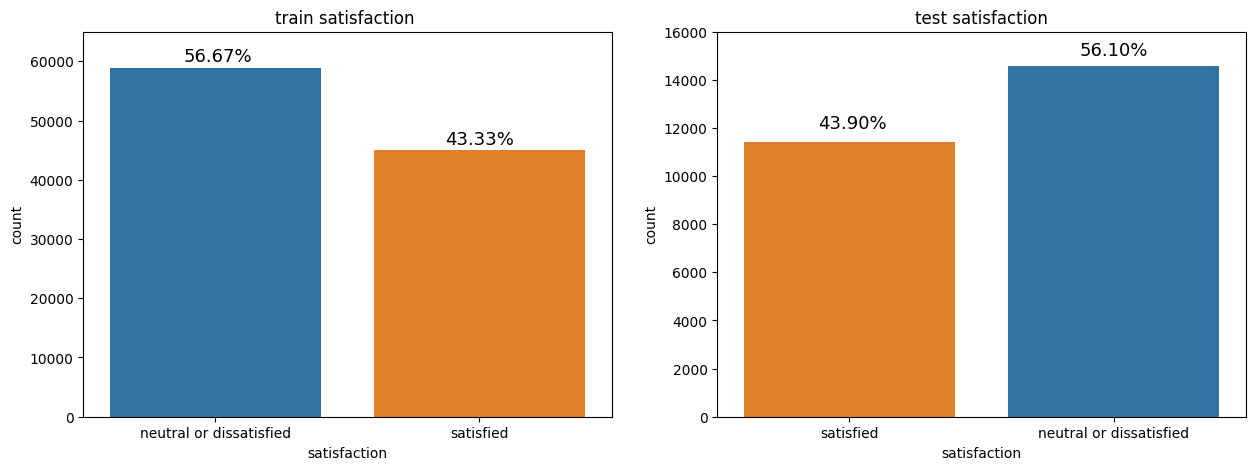

In [12]:
#정답 클래스 시각화

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=train, x="satisfaction", hue='satisfaction') # train 정답 클래스 countplot
plt.text(-0.12, 60000, '56.67%', size=13)
plt.text(0.87, 46000, '43.33%', size=13)
plt.ylim(0,65000)
plt.title("train satisfaction ")


plt.subplot(1,2,2)
colors = ["#FF7F0E", "#1F77B4"]
sns.set_palette(sns.color_palette(colors))
sns.countplot(data=test, x="satisfaction", hue='satisfaction') # test 정답 클래스 countplot
plt.title("test satisfaction")
plt.text(-0.12, 12000, '43.90%', size=13)
plt.text(0.87, 15000, '56.10%', size=13)
plt.ylim(0,16000)

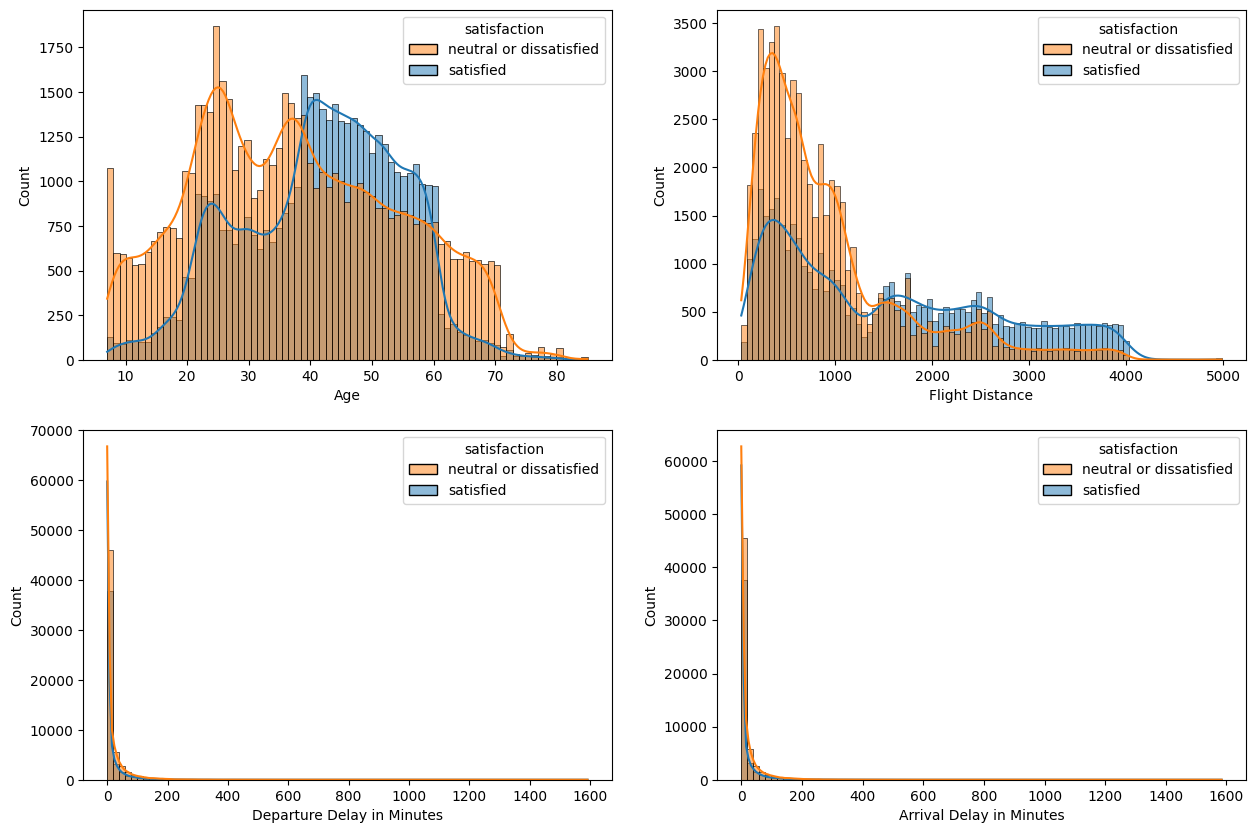

In [13]:
#히스토그램 확인
#'Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes'

plt.figure(figsize =(15,10))

#히스토그램으로 표현

for i in range(len(num_list)):
  plt.subplot(2,2,i+1)
  if num_list[i] in ['Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    sns.histplot(data=train , x=num_list[i], hue='satisfaction', kde=True, bins=80)
  else:
    sns.histplot(data=train , x=num_list[i], hue='satisfaction', kde=True)

([<matplotlib.axis.XTick at 0x7d608321dea0>,
 [Text(0, 0, 'Departure Delay in Minutes'),
  Text(1, 0, 'Arrival Delay in Minutes')])

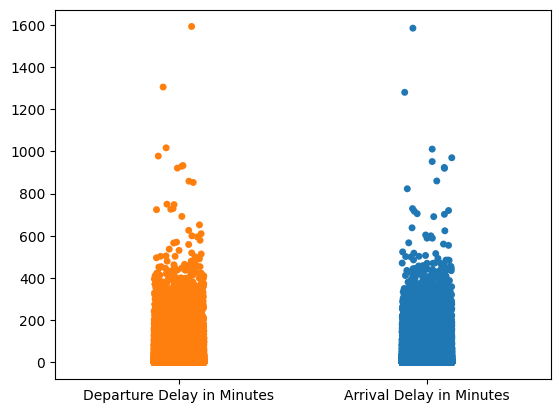

In [14]:
#'Departure Delay in Minutes','Arrival Delay in Minutes' 분포 확인

sns.stripplot(data=train[['Departure Delay in Minutes','Arrival Delay in Minutes']])
plt.xticks([0, 1],['Departure Delay in Minutes','Arrival Delay in Minutes'])

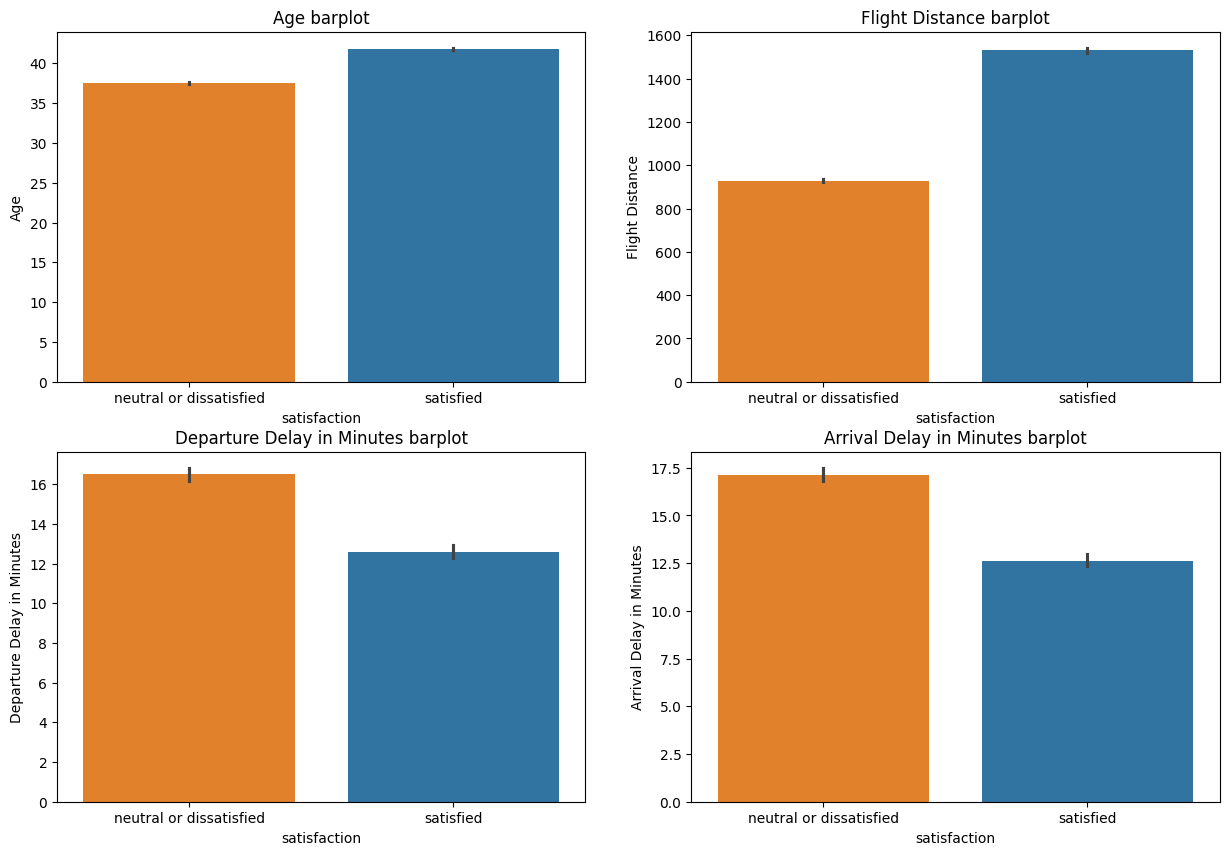

In [15]:
#수치형 데이터 barplot

plt.figure(figsize=(15,10))
for i in range(len(num_list)):
  plt.subplot(2, 2, i+1)
  sns.barplot(data=train, x="satisfaction", y=num_list[i], hue="satisfaction")
  plt.title(num_list[i]+' barplot')


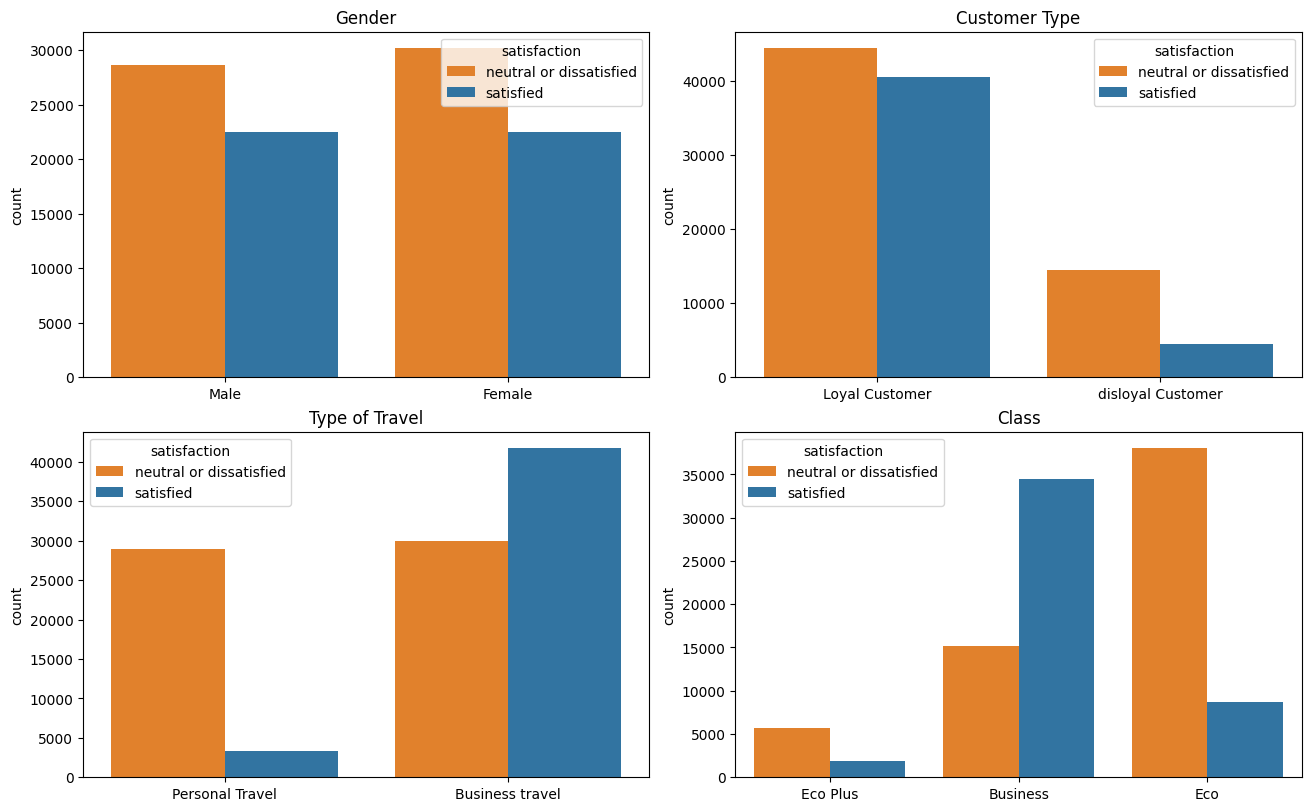

In [16]:
# 범주형 변수 시각화

plt.figure(figsize=(13,8), constrained_layout = True)
count = 1
for i in range(len(cate_list)-1):
  plt.subplot(2, 2, count)
  sns.countplot(data=train, x=cate_list[i], hue="satisfaction")
  plt.title(cate_list[i])
  plt.xlabel("")
  count += 1

In [17]:
#파이 차트 생성 > 각 컬럼 안에서 만족 비율

def count_pie(col):
  uni = np.sort(train[col].unique()).tolist() #정렬 포함
  count = 1
  for e in uni:
    plt.subplot(1,len(uni),count)
    p = train[train[col] == e].satisfaction.value_counts().sort_index()
    p.index = ['No', 'Yes']
    p.plot.pie(autopct='%.1f%%')
    plt.title(col+'\n'+ str(e),fontsize = 12 , fontweight = 'bold')
    count += 1

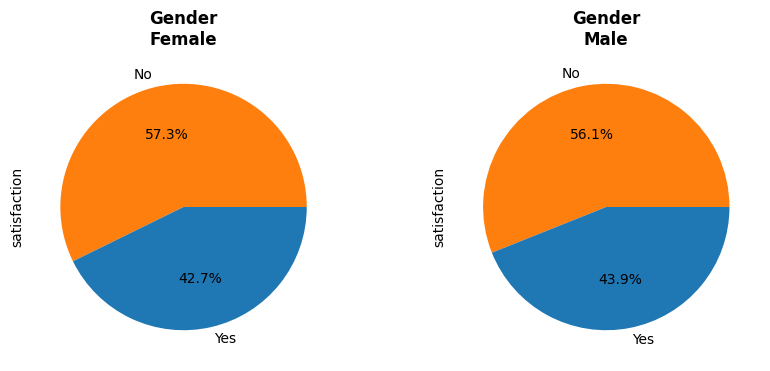

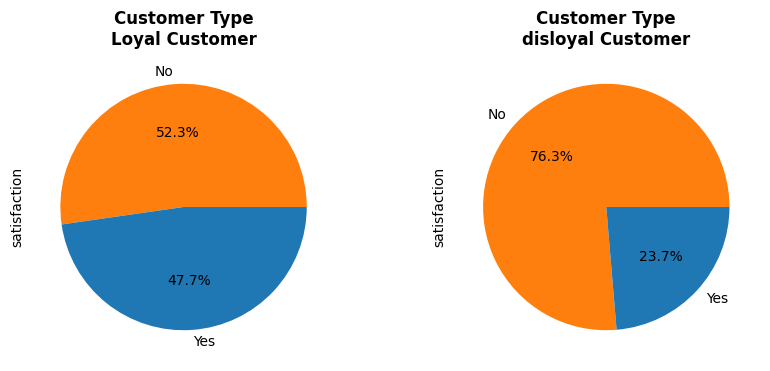

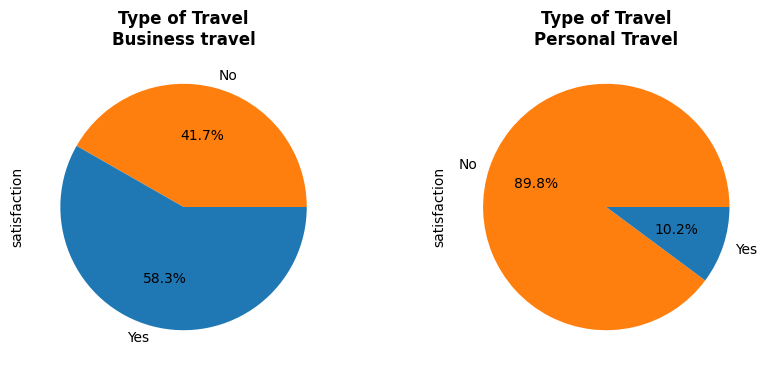

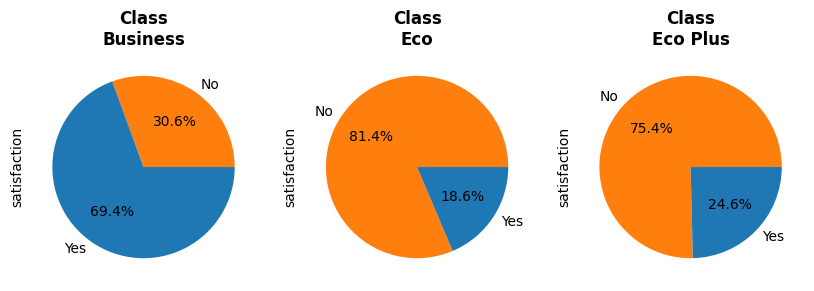

In [18]:
#파이 차트 생성 > 각 컬럼 안에서 만족 비율

for i in range(len(cate_list)-1):
  plt.figure(i+1,figsize=(10,4))
  count_pie(cate_list[i])

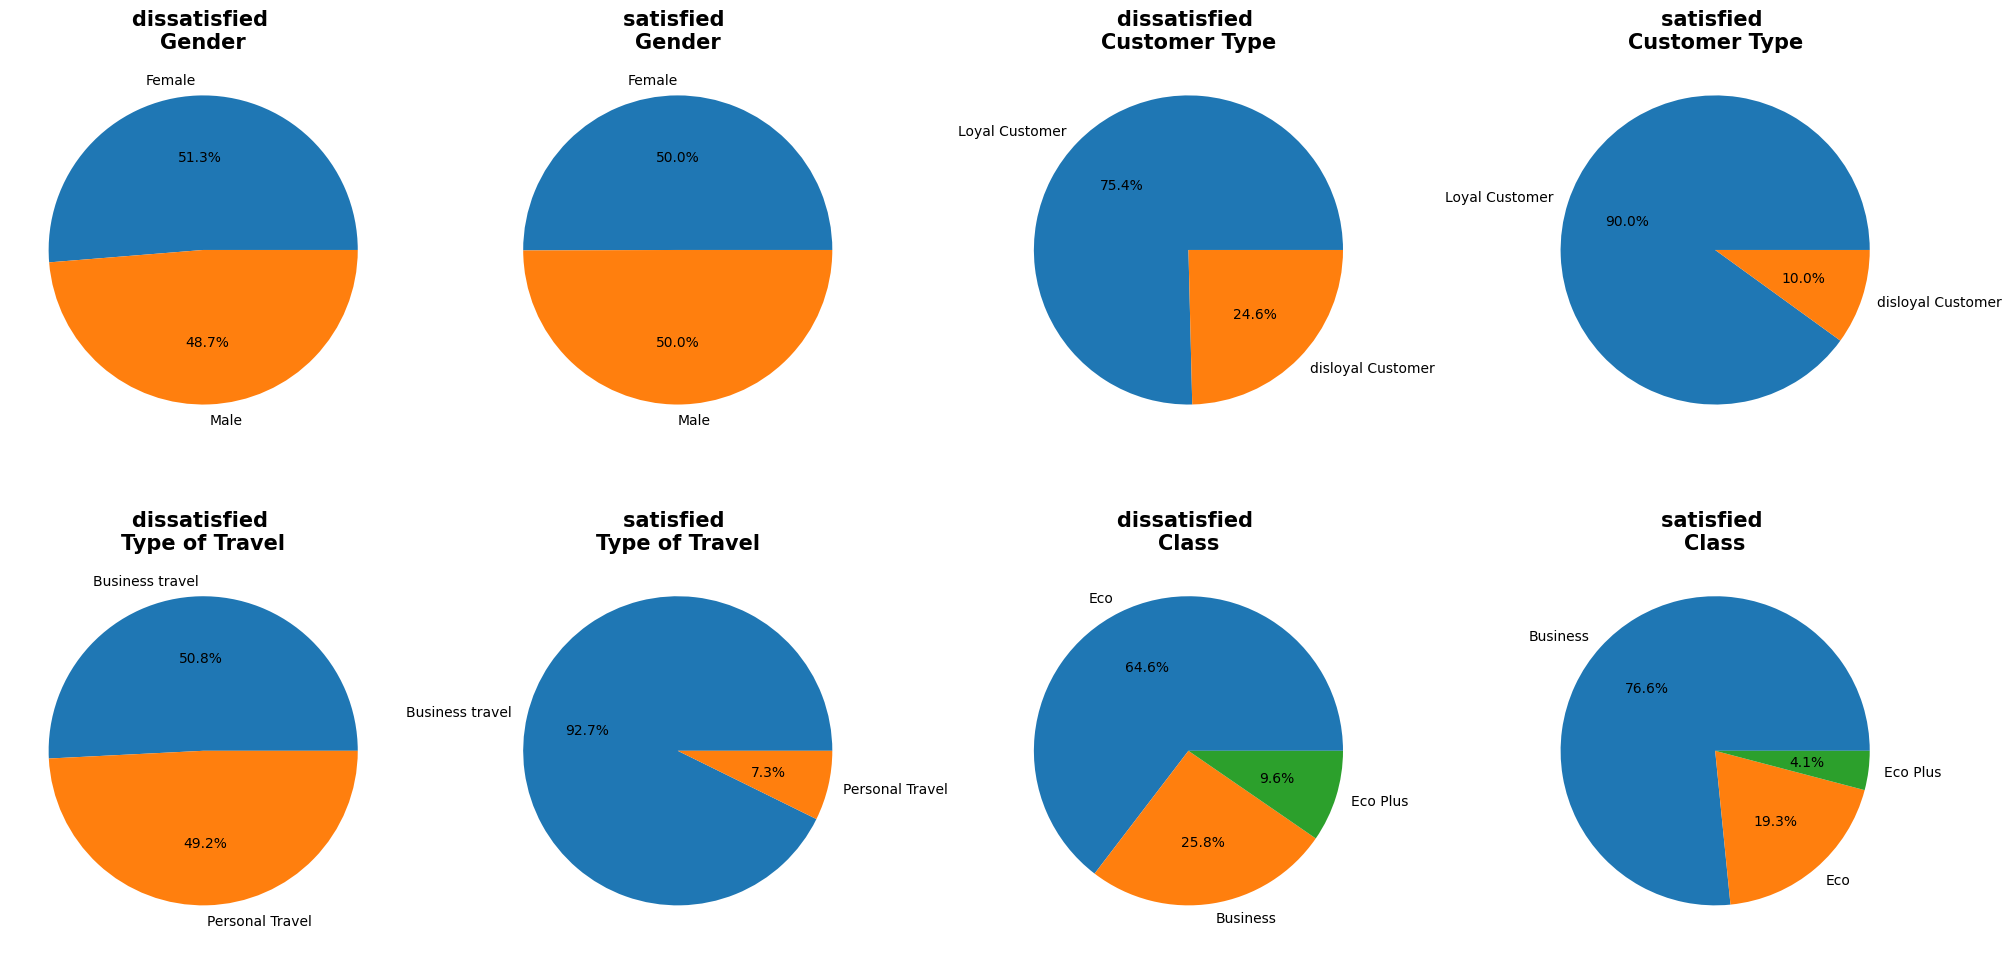

In [19]:
#파이 차트 > 만족 / 불만족 안에서 차지 비율

sa_true = train[train['satisfaction'] == 'satisfied']
sa_f = train[train['satisfaction'] == 'neutral or dissatisfied']

sns.set_palette(sns.color_palette('tab10')) #컬러 설정

plt.figure(figsize=(20, 10), constrained_layout = True)
n = 1

for i in range(len(cate_list)-1):
  plt.subplot(2, 4, (2*n-1))
  no_value = sa_f[cate_list[i]].value_counts()
  no_value.plot.pie(autopct='%.1f%%')
  plt.title('dissatisfied \n'+cate_list[i], fontsize = 15 , fontweight = 'bold')
  plt.ylabel("")

  plt.subplot(2, 4, (2*n))
  yes_value = sa_true[cate_list[i]].value_counts()
  yes_value.plot.pie(autopct='%.1f%%')
  plt.title('satisfied \n'+cate_list[i], fontsize = 15 , fontweight = 'bold')
  plt.ylabel("")
  n += 1

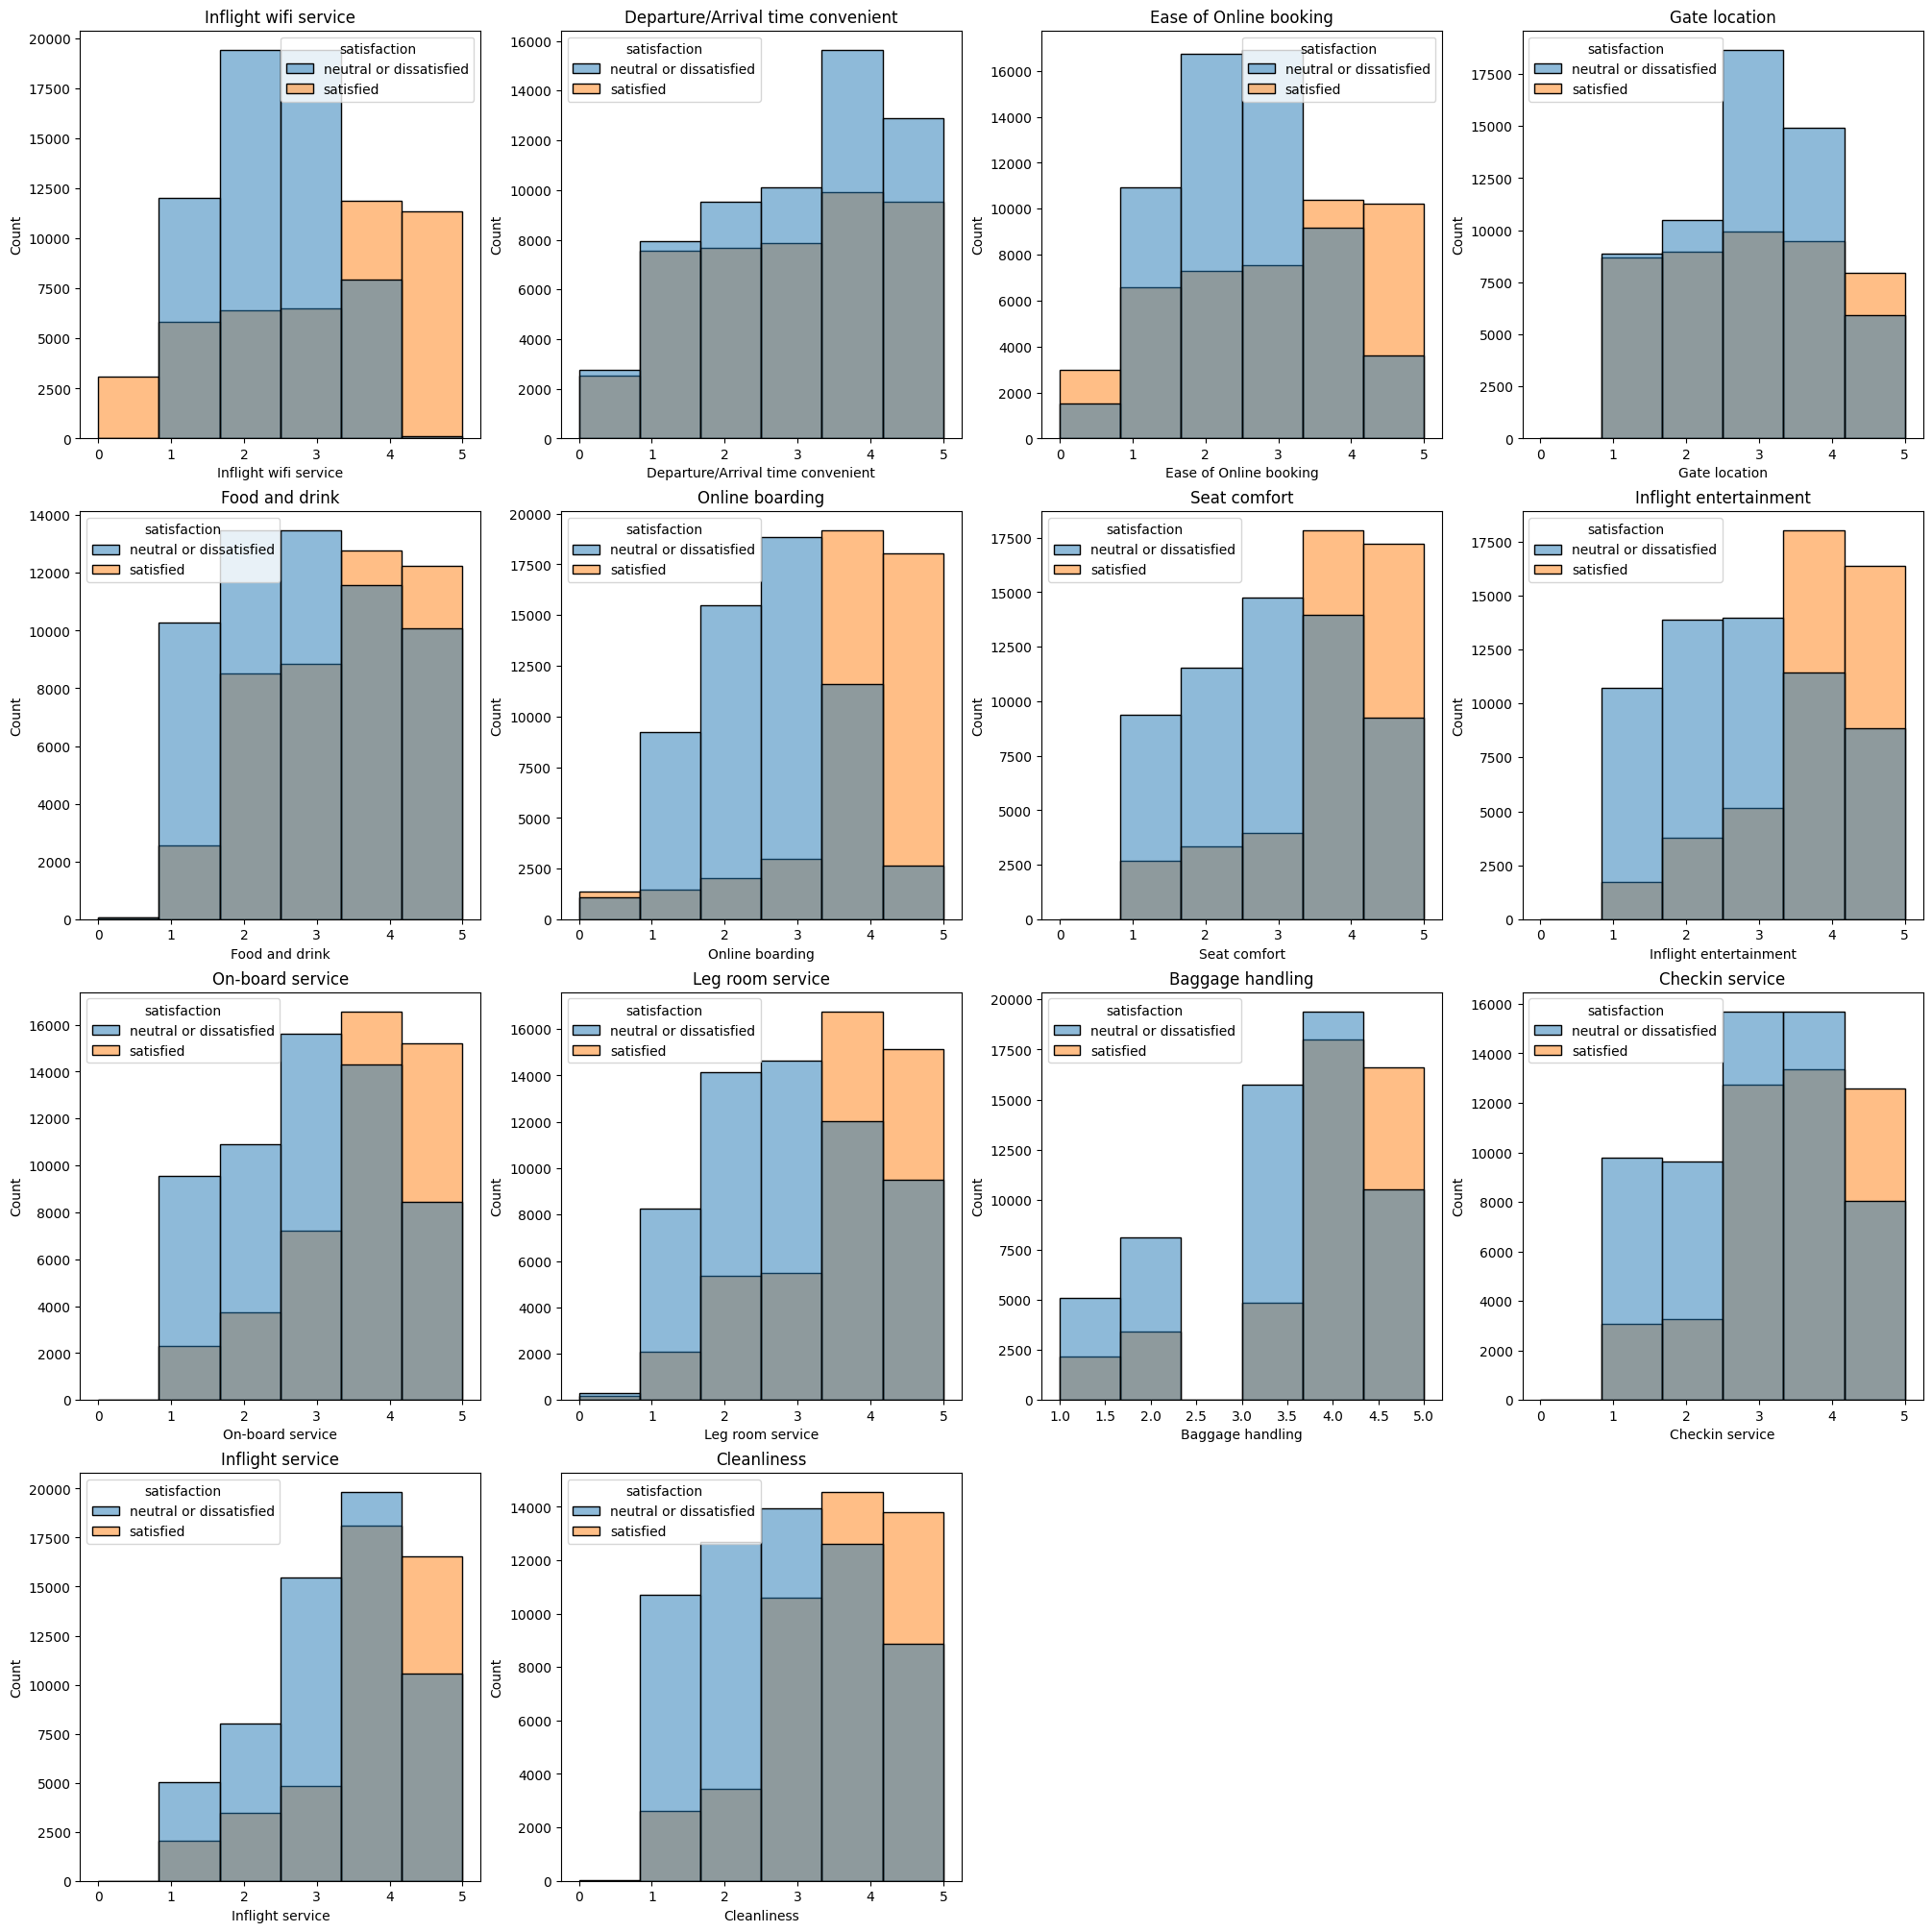

In [20]:
#만족도 컬럼 시각화 : 히스토그램
plt.figure(figsize=(20, 20), constrained_layout = True)
for i in range(len(sat_list)):
  plt.subplot(4,4,i+1)
  sns.histplot(data=train , x=sat_list[i], hue='satisfaction',bins=6)
  plt.title(sat_list[i])

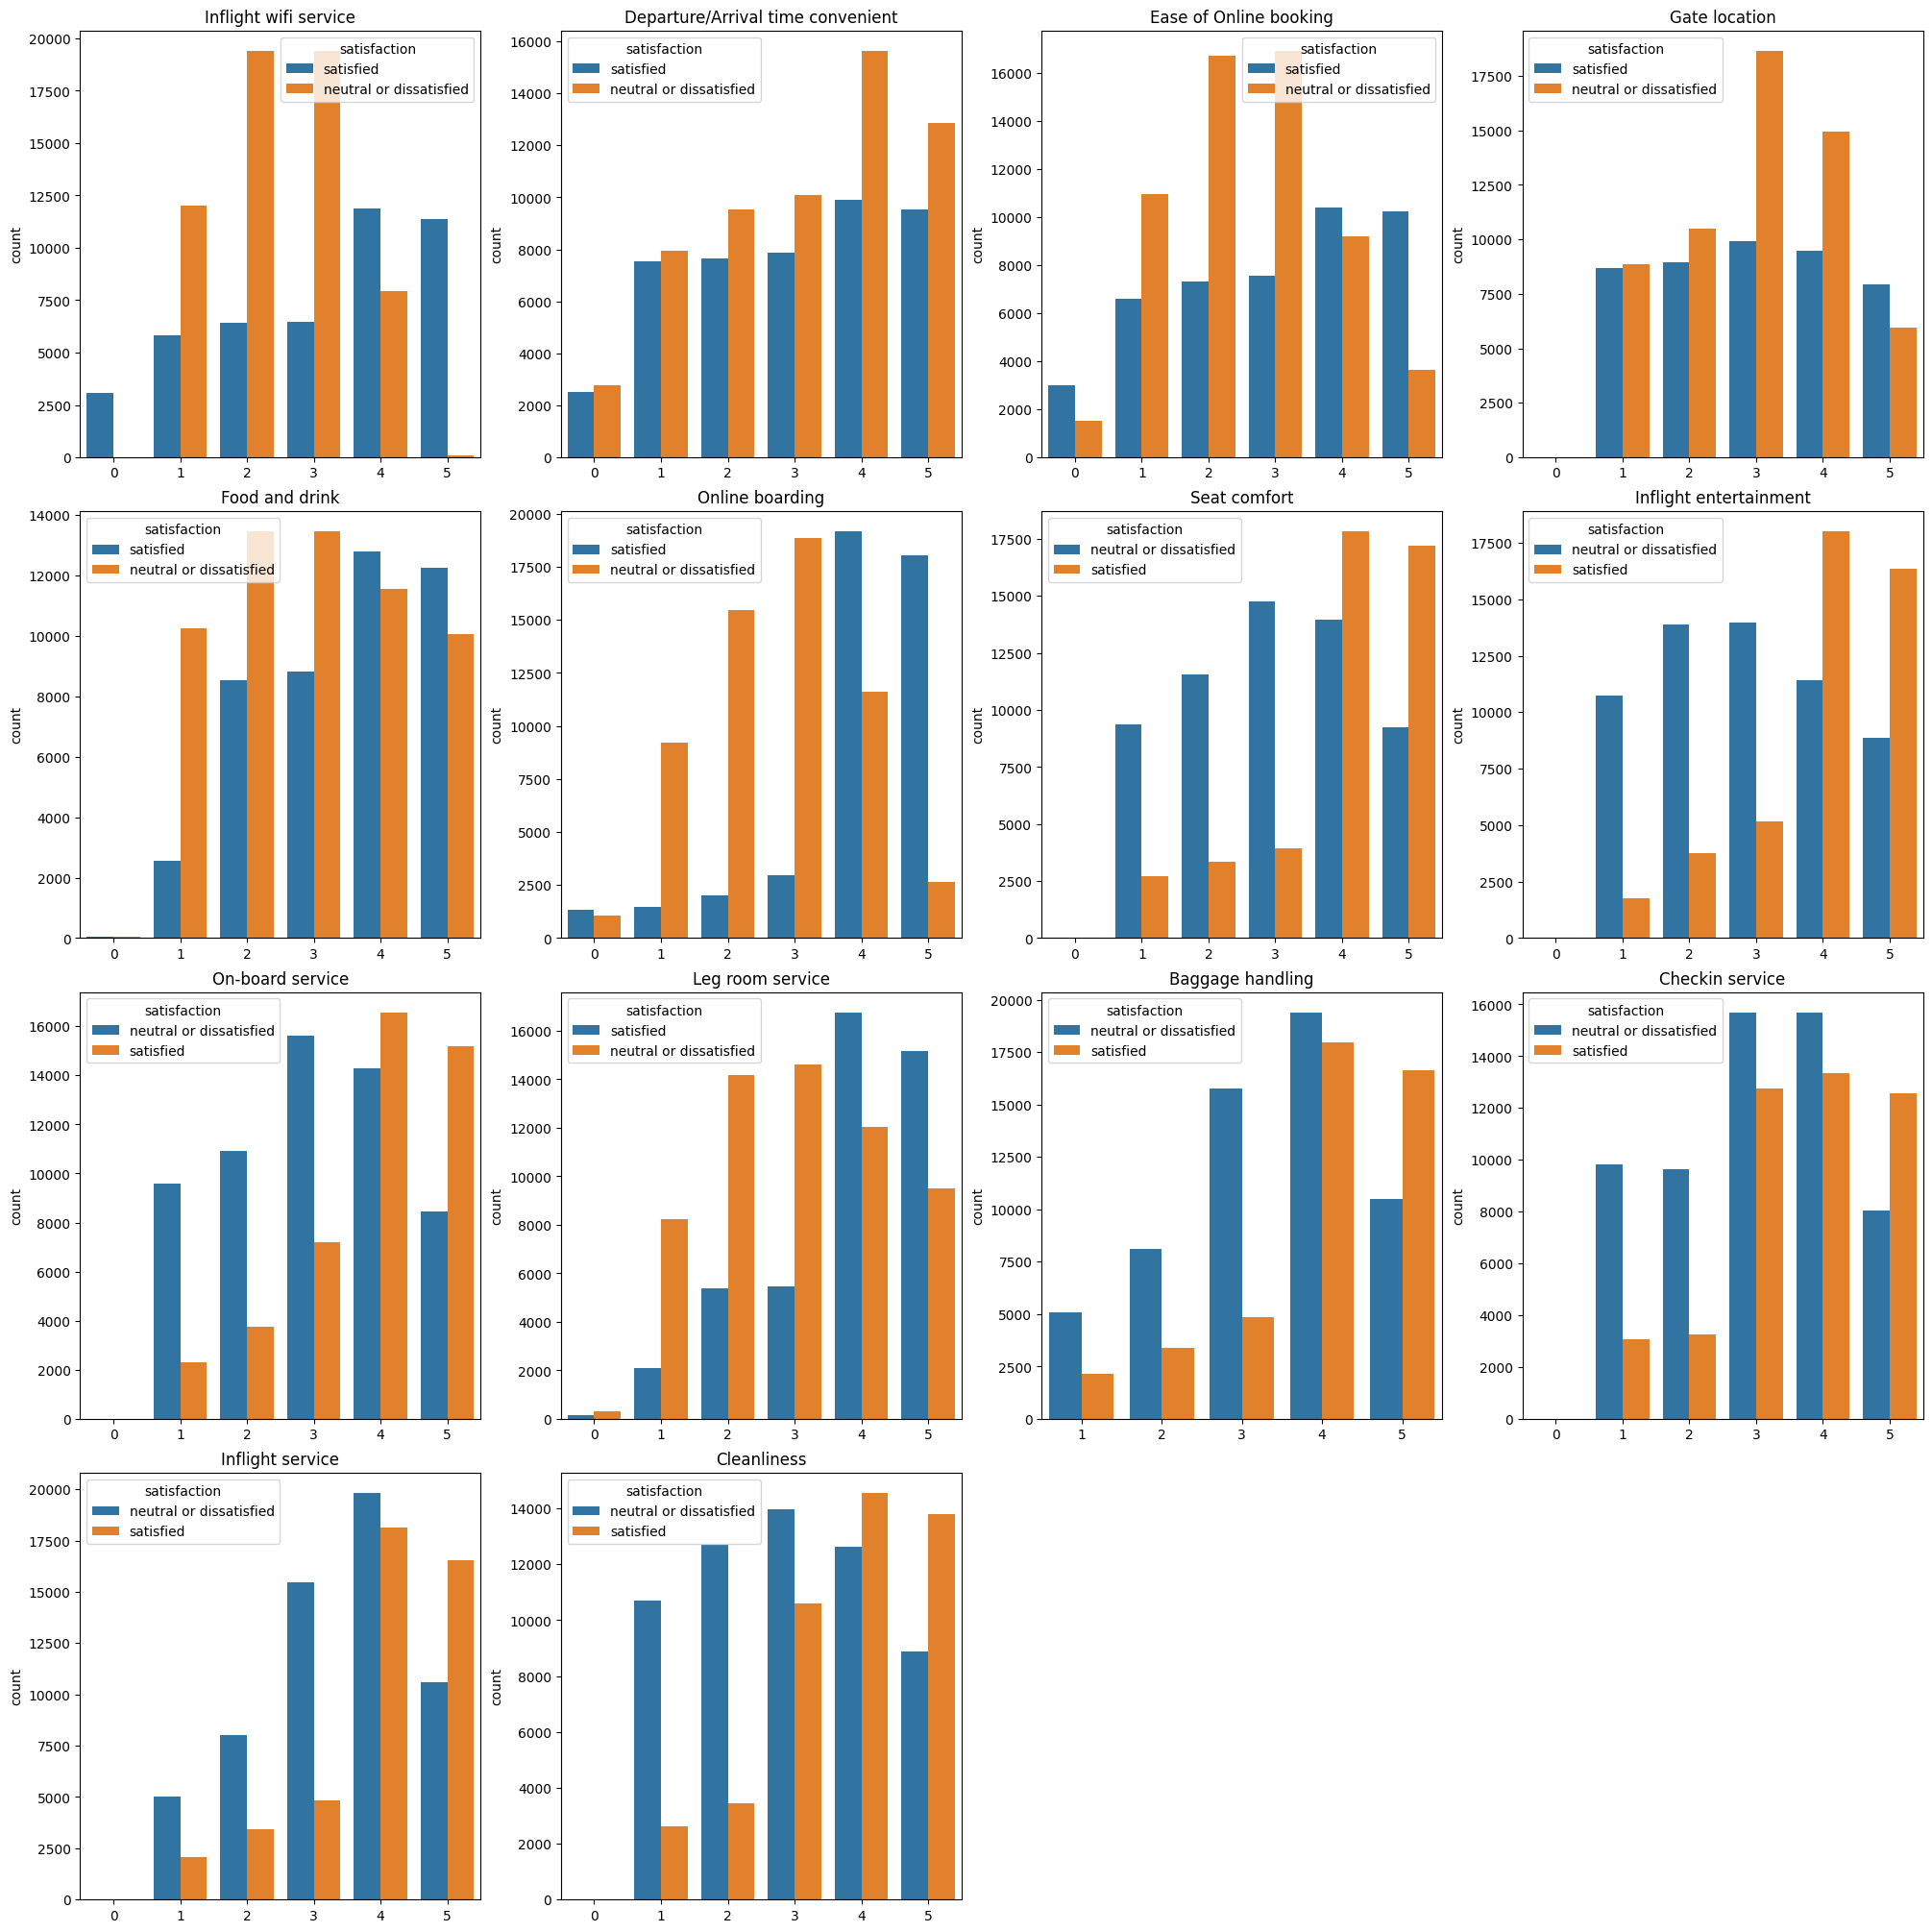

In [21]:
#만족도 컬럼 시각화 : countplot
plt.figure(figsize=(20, 20), constrained_layout = True)
count = 1
for i in range(len(sat_list)):
  plt.subplot(4, 4, count)
  sns.countplot(data=train, x=sat_list[i], hue="satisfaction")
  plt.title(sat_list[i])
  plt.xlabel("")
  count += 1


In [22]:
# 만족도 조사에서 0이라고 답한 경우 > 무응답

na_train = train.copy()

for i in range(len(sat_list)):
  na_train[sat_list[i]] = np.where(na_train[sat_list[i]] == 0, np.NaN, na_train[sat_list[i]])

na_train.isna().sum()

id                                      0
Gender                                  0
Customer Type                           0
Age                                     0
Type of Travel                          0
Class                                   0
Flight Distance                         0
Inflight wifi service                3103
Departure/Arrival time convenient    5300
Ease of Online booking               4487
Gate location                           1
Food and drink                        107
Online boarding                      2428
Seat comfort                            1
Inflight entertainment                 14
On-board service                        3
Leg room service                      472
Baggage handling                        0
Checkin service                         1
Inflight service                        3
Cleanliness                            12
Departure Delay in Minutes              0
Arrival Delay in Minutes              310
satisfaction                      

In [23]:
train = na_train.dropna(subset=sat_list) #약 9000개 정도의 데이터 drop < 결측치 처리를 하는 것보다는 양이 10% 이하이므로 제거가 좋다고 생각함

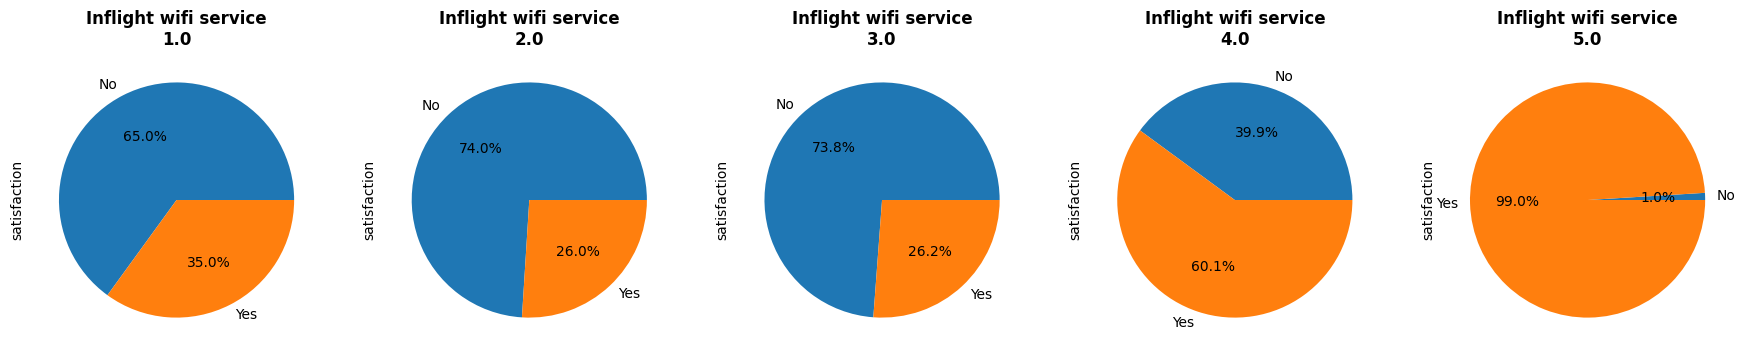

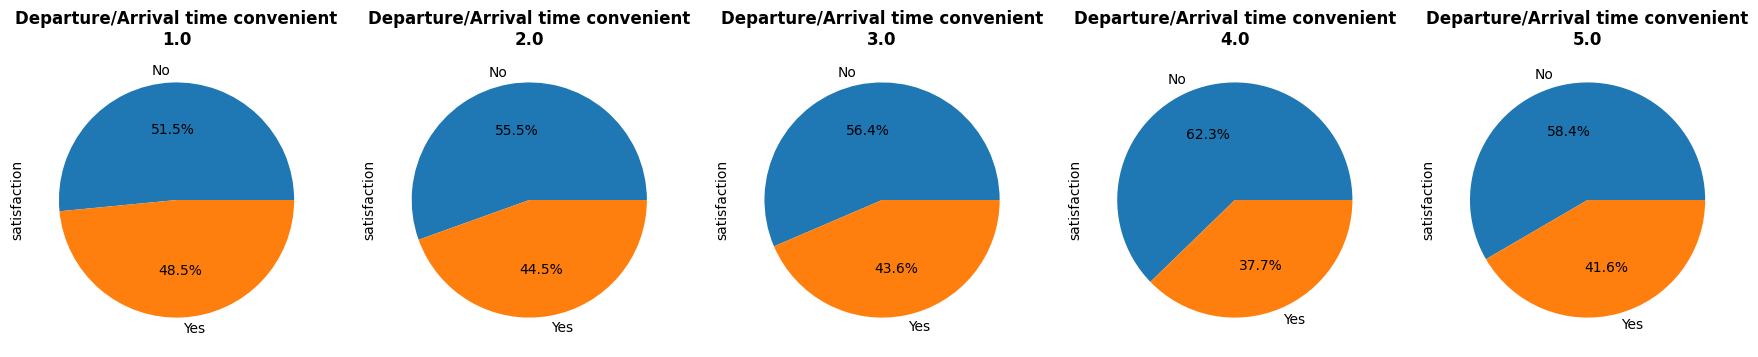

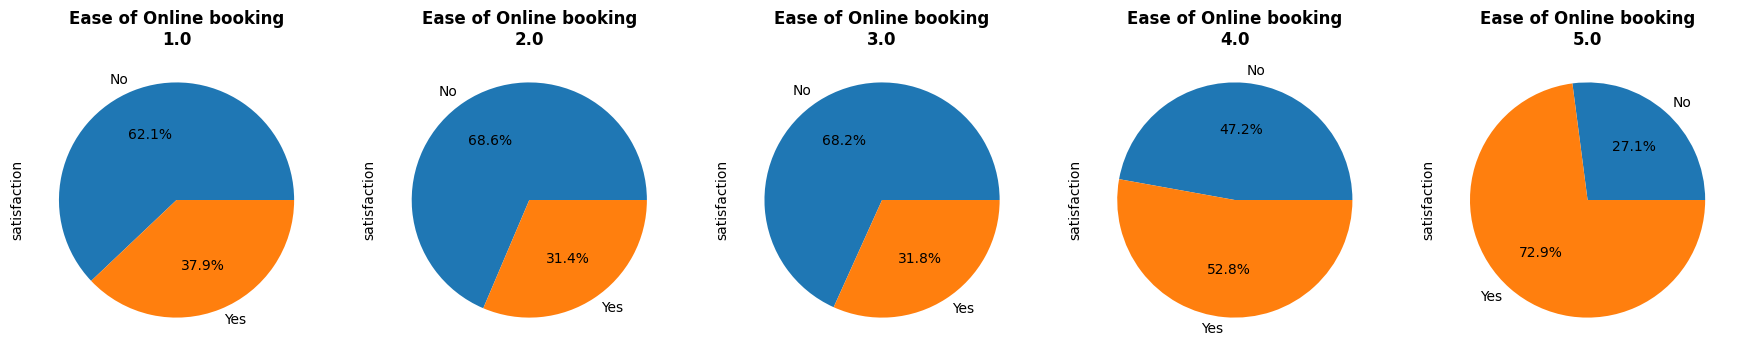

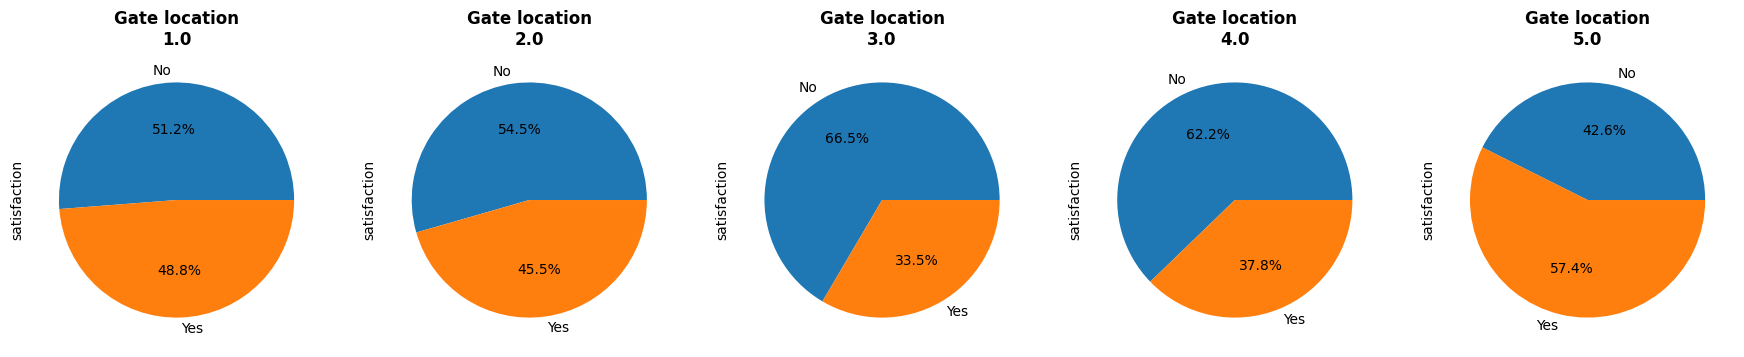

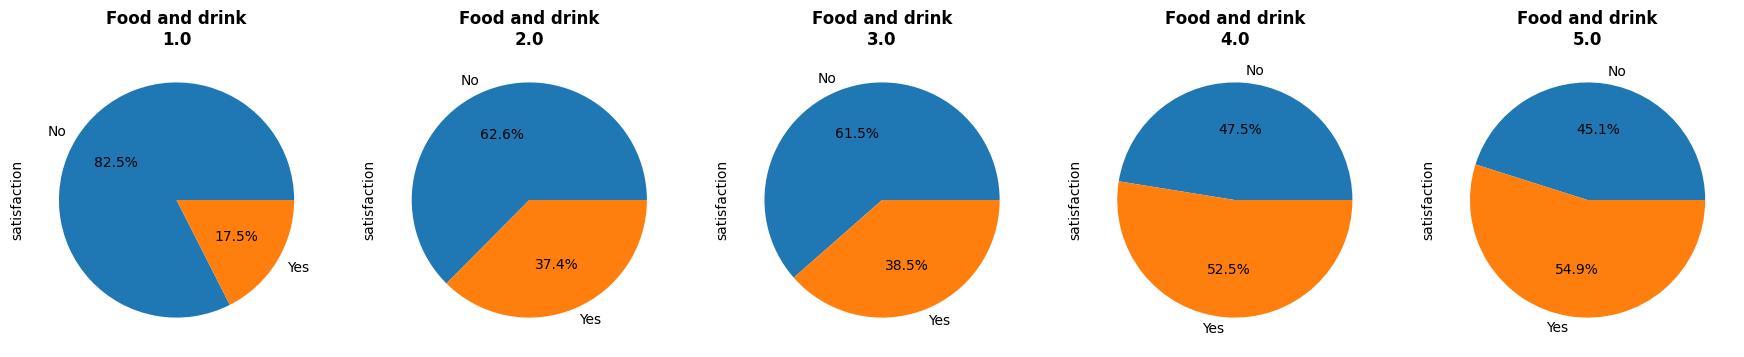

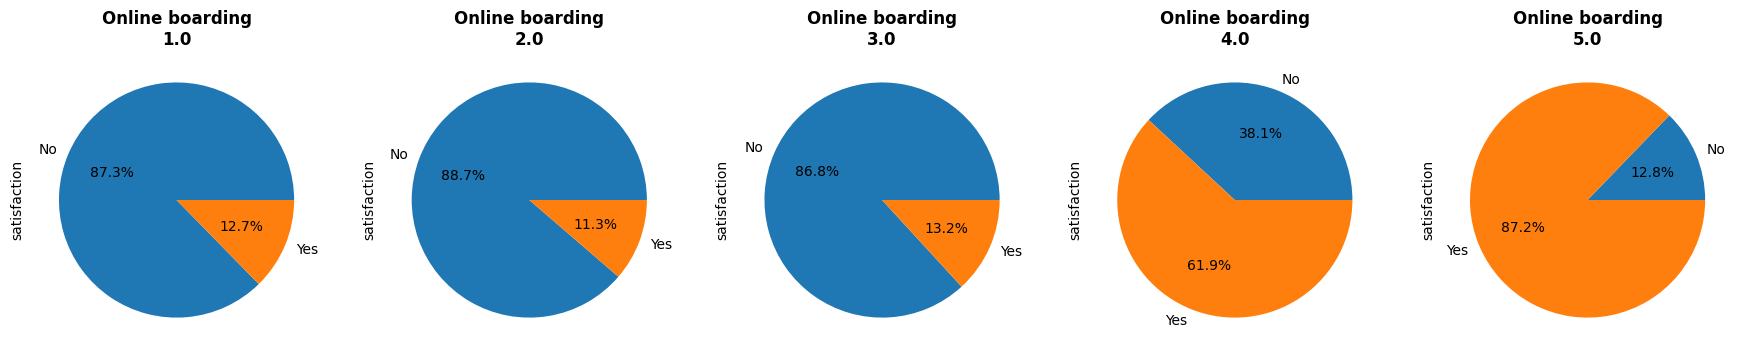

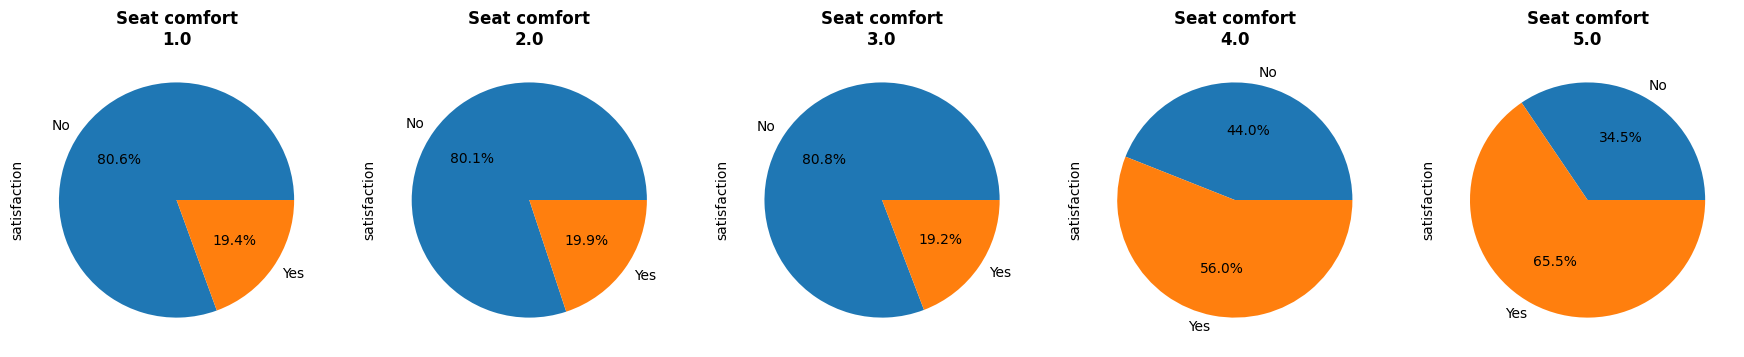

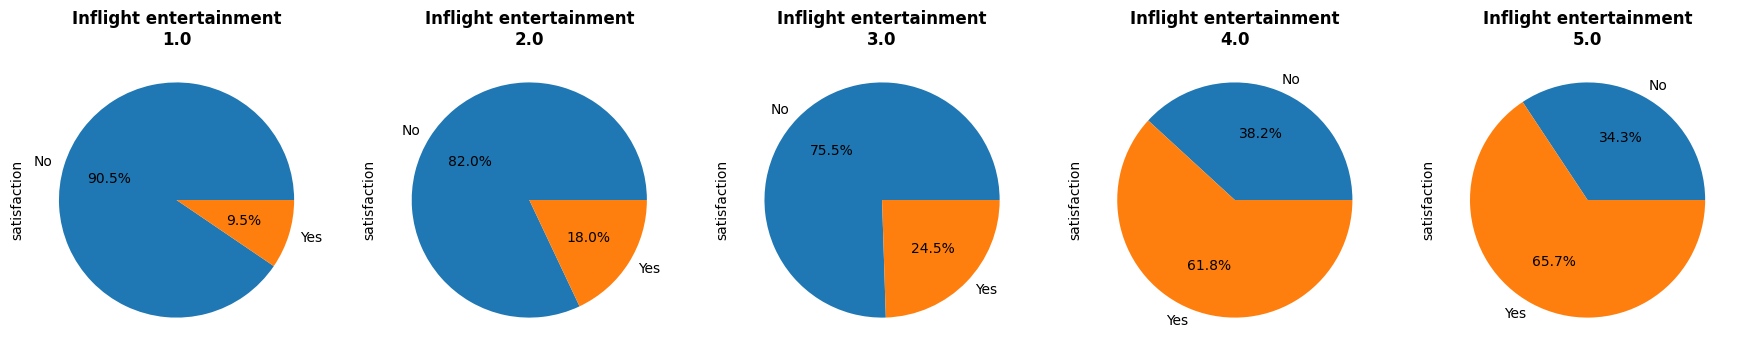

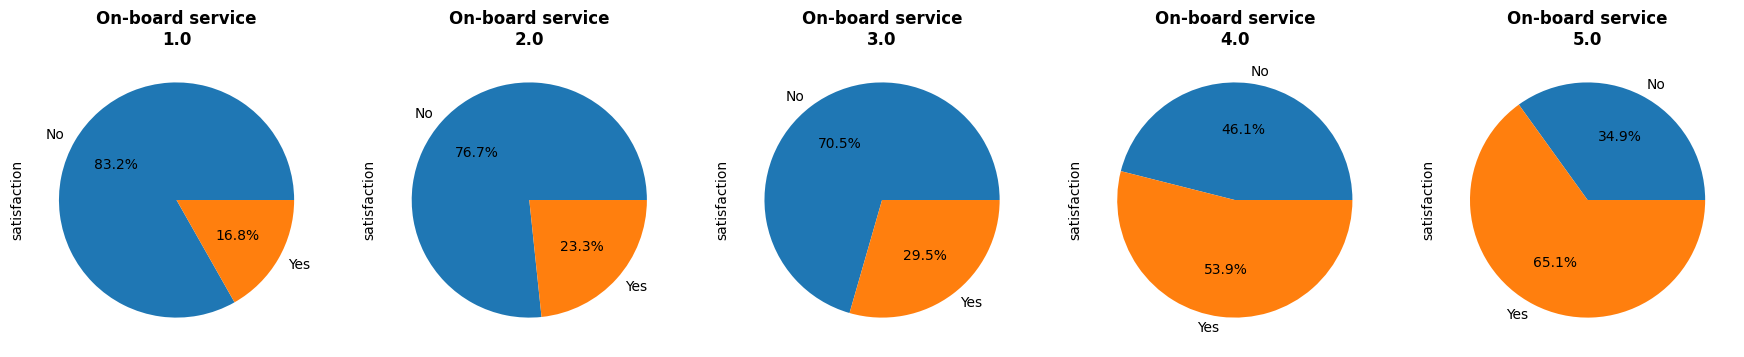

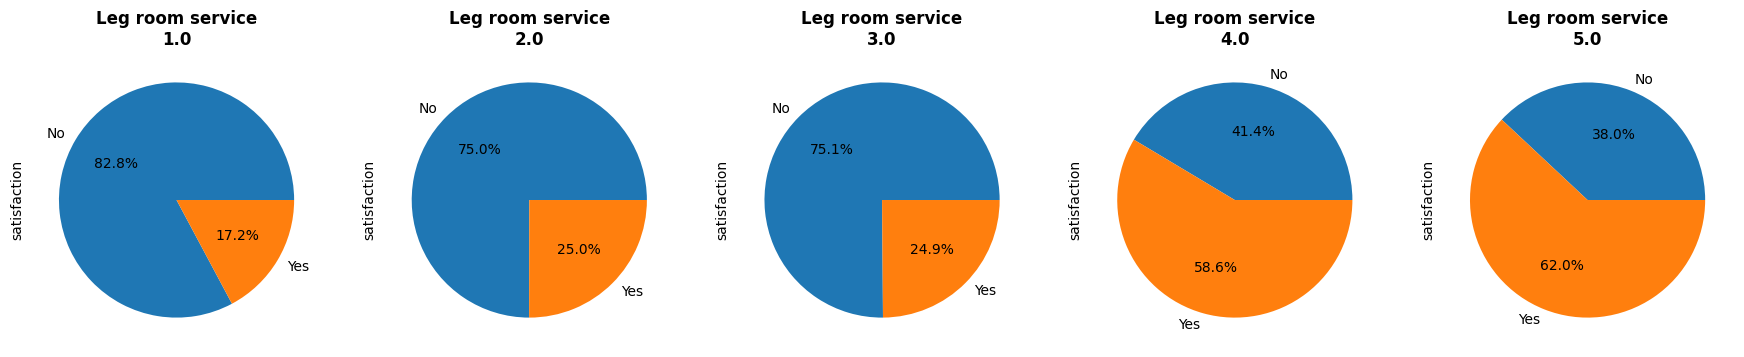

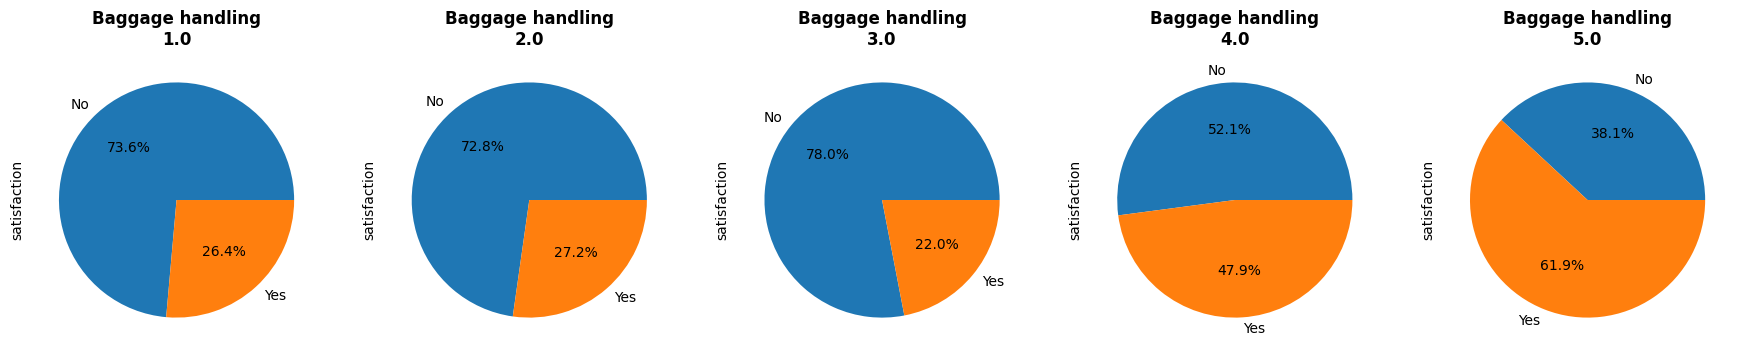

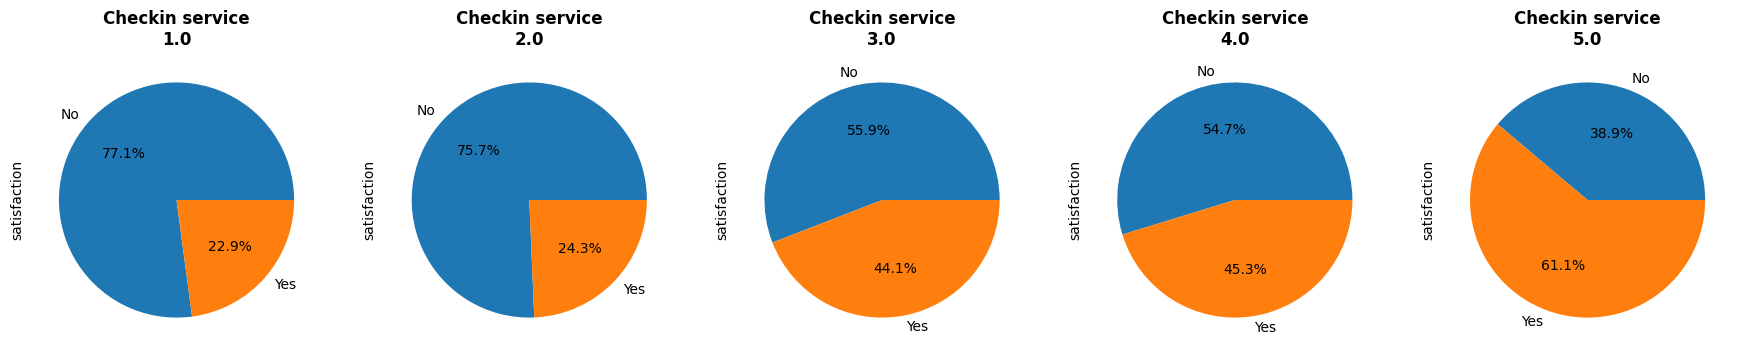

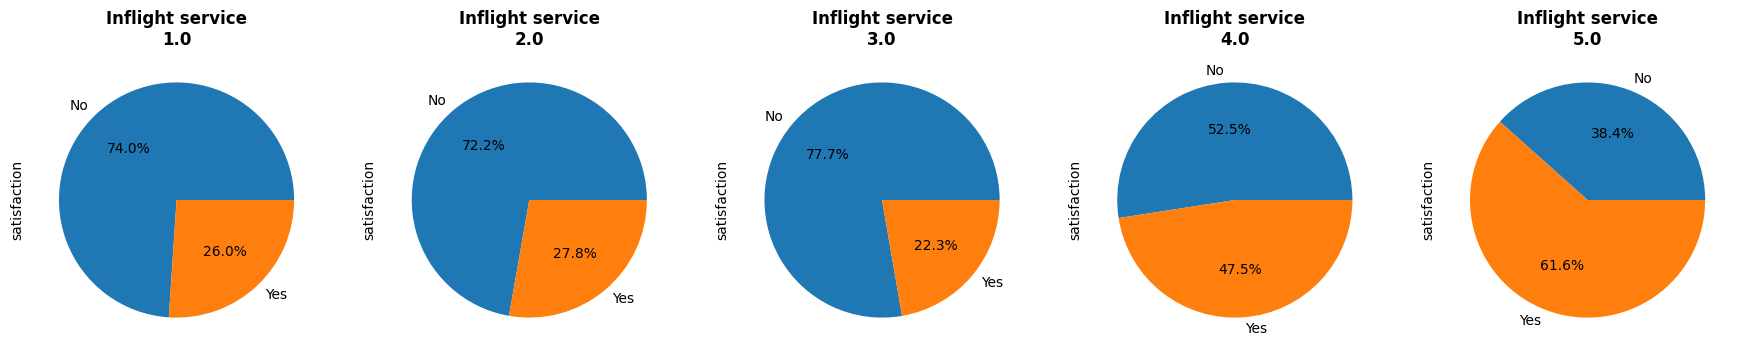

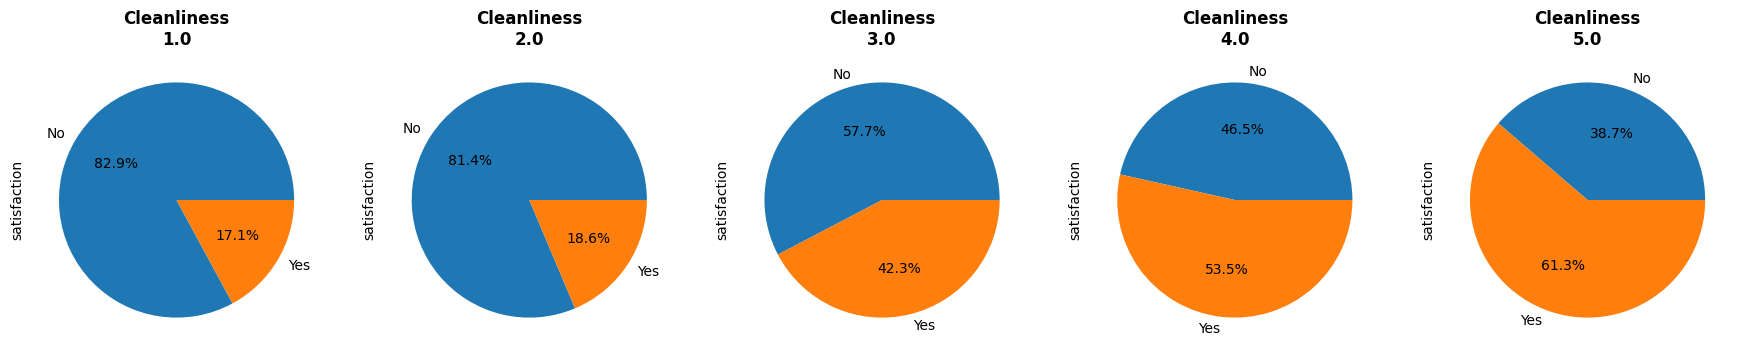

In [24]:
#만족도 컬럼 시각화 : pie 차트

for i in range(len(sat_list)):
  plt.figure(i+1,figsize=(22, 7))
  count_pie(sat_list[i])


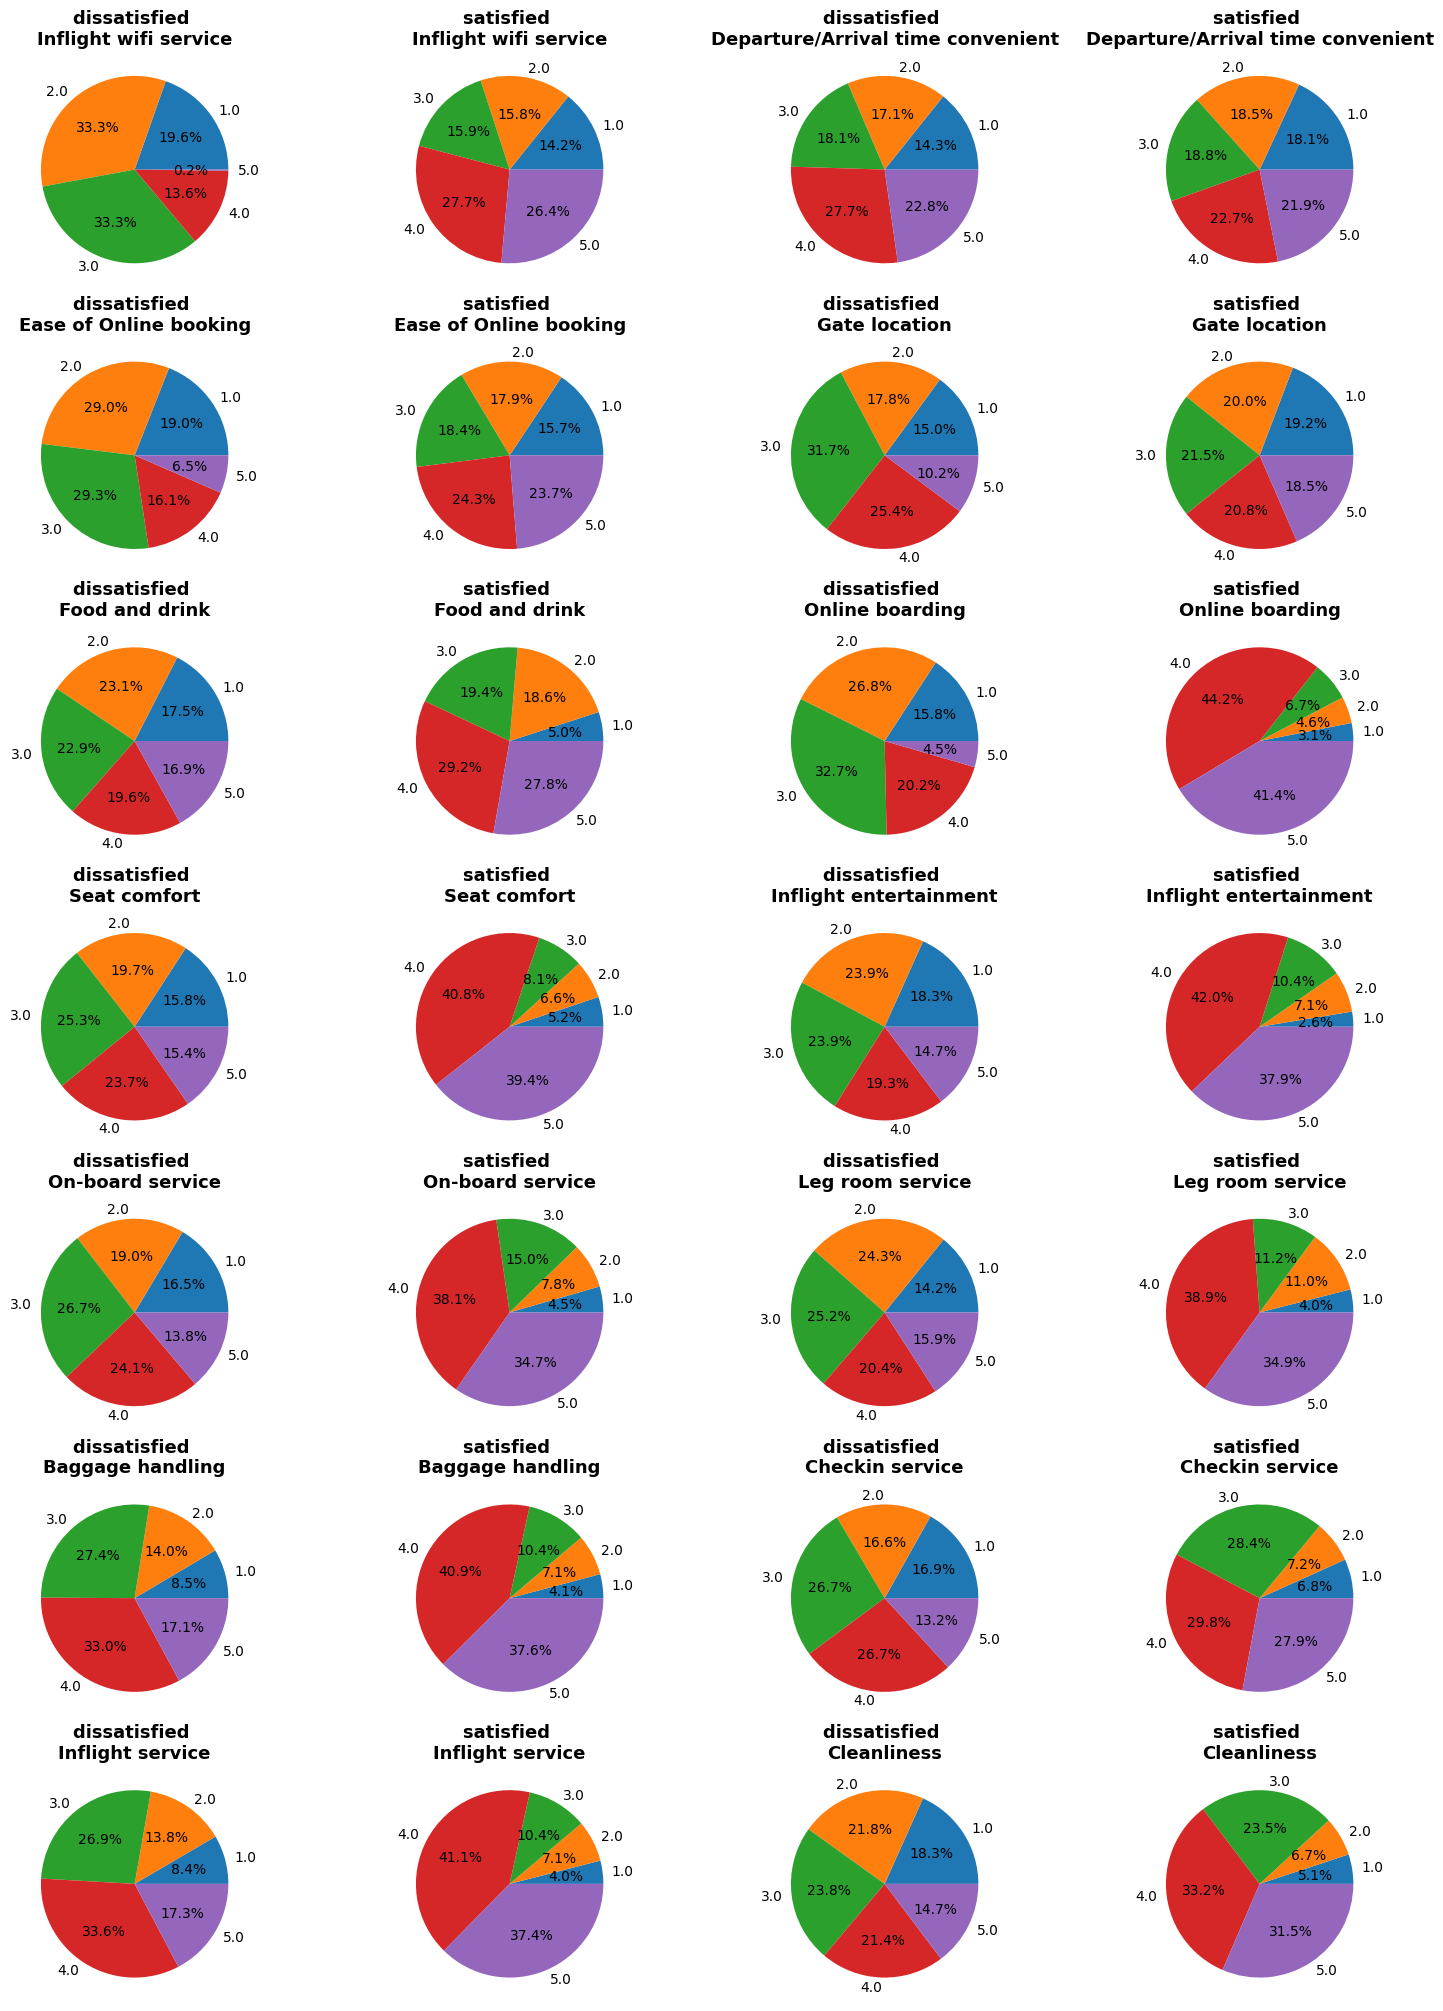

In [25]:
sa_true = train[train['satisfaction'] == 'satisfied']
sa_f = train[train['satisfaction'] == 'neutral or dissatisfied']

sns.set_palette(sns.color_palette('tab10')) #컬러 설정

plt.figure(figsize=(15, 20), constrained_layout = True)
n = 1

for i in range(len(sat_list)):
  plt.subplot(7, 4, (2*n-1))
  no_value = sa_f[sat_list[i]].value_counts().sort_index()
  no_value.plot.pie(autopct='%.1f%%')
  plt.title('dissatisfied \n'+sat_list[i], fontsize = 13 , fontweight = 'bold')
  plt.ylabel("")

  plt.subplot(7, 4, (2*n))
  yes_value = sa_true[sat_list[i]].value_counts().sort_index()
  yes_value.plot.pie(autopct='%.1f%%')
  plt.title('satisfied \n'+sat_list[i], fontsize = 13 , fontweight = 'bold')
  plt.ylabel("")
  n += 1

In [26]:
# pie 차트 결과 > 3 이하부터는 low / 4 이상부터는 high 로 취급
# 'Departure/Arrival time convenient','Gate location','Food and drink'는 만족/ 불만족 고객의 양상이 비슷 > 사용하지 않음

# low는 0, high는 1로 변환
def sati_level(e):
  if e < 4:
    return 0
  else:
    return 1

for col in sat_list:
  train[col] = train[col].apply(sati_level)

train.nunique()


<ipython-input-26-b25dff84fb99>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = train[col].apply(sati_level)


id                                   95704
Gender                                   2
Customer Type                            2
Age                                     75
Type of Travel                           2
Class                                    3
Flight Distance                       3793
Inflight wifi service                    2
Departure/Arrival time convenient        2
Ease of Online booking                   2
Gate location                            2
Food and drink                           2
Online boarding                          2
Seat comfort                             2
Inflight entertainment                   2
On-board service                         2
Leg room service                         2
Baggage handling                         2
Checkin service                          2
Inflight service                         2
Cleanliness                              2
Departure Delay in Minutes             437
Arrival Delay in Minutes               443
satisfactio

In [27]:
# 'Departure/Arrival time convenient','Gate location','Food and drink'는 만족/ 불만족 고객의 양상이 비슷 > 사용하지 않음

train.drop(['Departure/Arrival time convenient','Gate location','Food and drink'], axis=1,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95704 entries, 0 to 103903
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          95704 non-null  int64  
 1   Gender                      95704 non-null  object 
 2   Customer Type               95704 non-null  object 
 3   Age                         95704 non-null  int64  
 4   Type of Travel              95704 non-null  object 
 5   Class                       95704 non-null  object 
 6   Flight Distance             95704 non-null  int64  
 7   Inflight wifi service       95704 non-null  int64  
 8   Ease of Online booking      95704 non-null  int64  
 9   Online boarding             95704 non-null  int64  
 10  Seat comfort                95704 non-null  int64  
 11  Inflight entertainment      95704 non-null  int64  
 12  On-board service            95704 non-null  int64  
 13  Leg room service            95

<ipython-input-27-593b8215d13a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['Departure/Arrival time convenient','Gate location','Food and drink'], axis=1,inplace=True)


In [28]:
# total > 만족도 점수 합산
train['total'] = (train['Inflight wifi service'] + train['On-board service']+ train['Leg room service']+train['Baggage handling']+
                  train['Ease of Online booking']+ train['Online boarding']+train['Seat comfort']+train['Inflight entertainment']+train['Checkin service']+
                  train['Inflight service']+train['Cleanliness'])

train['total'].describe()

<ipython-input-28-0ce335925885>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total'] = (train['Inflight wifi service'] + train['On-board service']+ train['Leg room service']+train['Baggage handling']+


count    95704.000000
mean         5.506875
std          2.983999
min          0.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: total, dtype: float64

<Axes: xlabel='total', ylabel='count'>

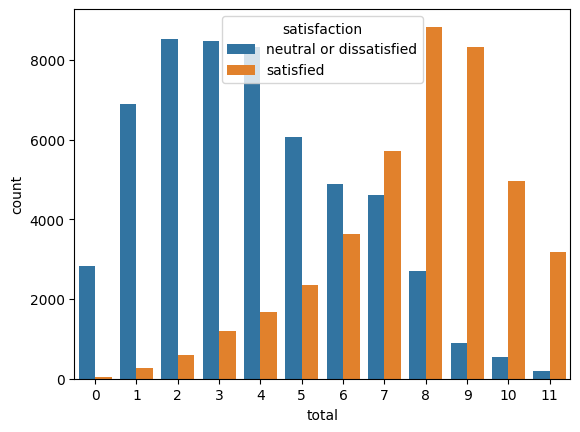

In [29]:
# total 컬럼 시각화

sns.countplot(data=train, x='total', hue="satisfaction") # 7 이상부터는 만족 수가 높음

In [30]:
# 'Departure Delay in Minutes' 를 가지고 지연 시간 발생 / 정상 출발 컬럼 생성

def start(e):
  if e < 1:
    return 'No'
  else:
    return 'Yes'

train['Delay'] = train['Departure Delay in Minutes'].apply(start)

train.Delay.value_counts(1)

<ipython-input-30-2e118eb3330a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Delay'] = train['Departure Delay in Minutes'].apply(start)


No     0.560457
Yes    0.439543
Name: Delay, dtype: float64

([<matplotlib.axis.XTick at 0x7d6080f1d960>], [Text(1, 0, 'Flight Distance')])

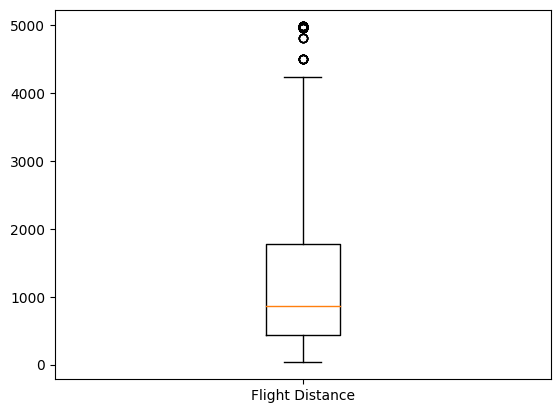

In [31]:
# Flight Distance boxplot

plt.boxplot(train['Flight Distance'],whis = 2)
plt.xticks([1],['Flight Distance'])

In [32]:
# Flight Distance 범주화
# 히스토그램 > 1500 부근에서 감소
# box plot > 중앙값은 1000 이하, 3분위수는 2000 이하
# 1500 이하는 단기, 1500 초과는 장기로 판단

def dist(e):
  if e <= 1500:
    return 'short'
  else:
    return 'long'

train['Distance'] = train['Flight Distance'].apply(dist)

train.groupby(['Distance', 'satisfaction']).agg(count=('Distance', 'count'))

<ipython-input-32-72e82b120342>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Distance'] = train['Flight Distance'].apply(dist)


count
Distance satisfaction                  
long     neutral or dissatisfied  10465
         satisfied                19651
short    neutral or dissatisfied  44482
         satisfied                21106

<ipython-input-33-09b98feff9ea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age_ca'] = pd.cut(train['Age'],4,labels=["c", "p", "a", "o"])


<Axes: xlabel='Age_ca', ylabel='count'>

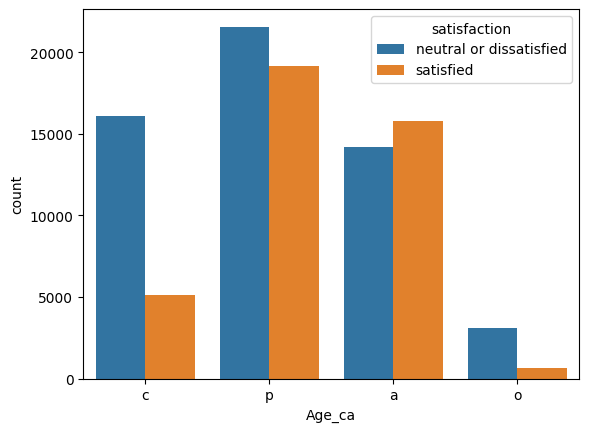

In [33]:
# 나이 구간화
# 4개의 구간으로 나눔

# 26.5, 46.0 , 65.5, 85.0] < 이렇게 4 구간으로 나눔

train['Age_ca'] = pd.cut(train['Age'],4,labels=["c", "p", "a", "o"])

sns.countplot(data=train, x='Age_ca', hue="satisfaction")

In [34]:
air_train = train[['Gender', 'Customer Type', 'Type of Travel', 'Class','Inflight wifi service','total', 'Delay', 'Distance', 'Age_ca', 'satisfaction']].copy()
air_train = air_train.reset_index(drop=True)
air_train

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,total,Delay,Distance,Age_ca,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,0,7,Yes,short,c,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,0,2,Yes,short,c,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,0,8,No,short,c,satisfied
3,Female,Loyal Customer,Business travel,Business,0,3,Yes,short,c,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,0,4,No,short,a,satisfied
...,...,...,...,...,...,...,...,...,...,...
95699,Female,disloyal Customer,Business travel,Eco,0,1,Yes,short,c,neutral or dissatisfied
95700,Male,Loyal Customer,Business travel,Business,1,11,No,long,a,satisfied
95701,Male,disloyal Customer,Business travel,Business,0,6,Yes,long,p,neutral or dissatisfied
95702,Female,disloyal Customer,Business travel,Eco,0,4,No,short,c,neutral or dissatisfied


In [35]:
### test 도 똑같은 작업을 거쳐서 학습 데이터셋과 같은 형태로 make

#만족도 이진화
for col in sat_list:
  test[col] = test[col].apply(sati_level) #학습 데이터셋에서는 0은 없앴지만, 여기서는 0을 포함해서 전처리

#total 생성
test['total'] = (test['Inflight wifi service'] + test['On-board service']+ test['Leg room service']+test['Baggage handling']+
                  test['Ease of Online booking']+ test['Online boarding']+test['Seat comfort']+test['Inflight entertainment']+test['Checkin service']+
                  test['Inflight service']+test['Cleanliness'])

test['Delay'] = test['Departure Delay in Minutes'].apply(start)
test['Distance'] = test['Flight Distance'].apply(dist)

def age(e):
  if e < 26.5:
    return 'c'
  elif e < 46.0:
    return 'p'
  elif e < 65.5:
    return 'a'
  else:
    return 'o'

test['Age_ca'] = test['Age'].apply(age)

air_test = test[['Gender', 'Customer Type', 'Type of Travel', 'Class','Inflight wifi service','total', 'Delay', 'Distance', 'Age_ca', 'satisfaction']].copy()
air_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 25976 non-null  object
 1   Customer Type          25976 non-null  object
 2   Type of Travel         25976 non-null  object
 3   Class                  25976 non-null  object
 4   Inflight wifi service  25976 non-null  int64 
 5   total                  25976 non-null  int64 
 6   Delay                  25976 non-null  object
 7   Distance               25976 non-null  object
 8   Age_ca                 25976 non-null  object
 9   satisfaction           25976 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.2+ MB


In [36]:
air_train = pd.get_dummies(air_train) #원 핫 인코딩
air_test = pd.get_dummies(air_test)

In [37]:
air_train = air_train.sort_index(axis=1) #열 정렬
air_test = air_test.sort_index(axis=1)

#### 모델 훈련 - baseline

- 결정 트리
- 랜덤 포레스트
- GradientBoosting

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


#데이터셋 분할
train_x = air_train.drop(['satisfaction_neutral or dissatisfied', 'satisfaction_satisfied'], axis = 1)
train_y = air_train['satisfaction_satisfied']

test_x = air_test.drop(['satisfaction_neutral or dissatisfied', 'satisfaction_satisfied'], axis = 1)
test_y = air_test['satisfaction_satisfied']



In [39]:
from sklearn.metrics import accuracy_score #정확도
from sklearn.metrics import roc_auc_score

#결정 트리 모델 사용

model = DecisionTreeClassifier(random_state=42)
model.fit(train_x, train_y)
y_predict = model.predict(test_x)
basedt = accuracy_score(test_y, y_predict) #정확도 출력
print("DecisionTree Baseline: ", basedt*100)

#train 정확도
train_p = model.predict(train_x)
print("DecisionTree train: ",accuracy_score(train_y, train_p))


#auc 점수
print("DecisionTree AUC: ",roc_auc_score(test_y, model.predict_proba(test_x)[:,1]))

DecisionTree Baseline:  88.43932861102556
DecisionTree train:  0.9157819944829892
DecisionTree AUC:  0.9412481028614021


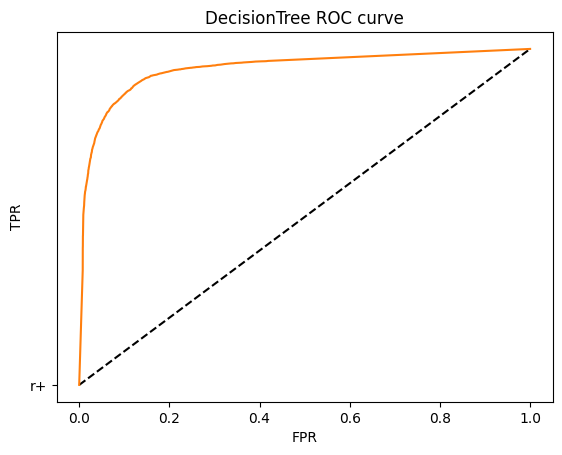

In [40]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y, model.predict_proba(test_x)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='DecisionTree')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('DecisionTree ROC curve')
plt.show()

Text(0.5, 1.0, 'DecisionTree feature importances')

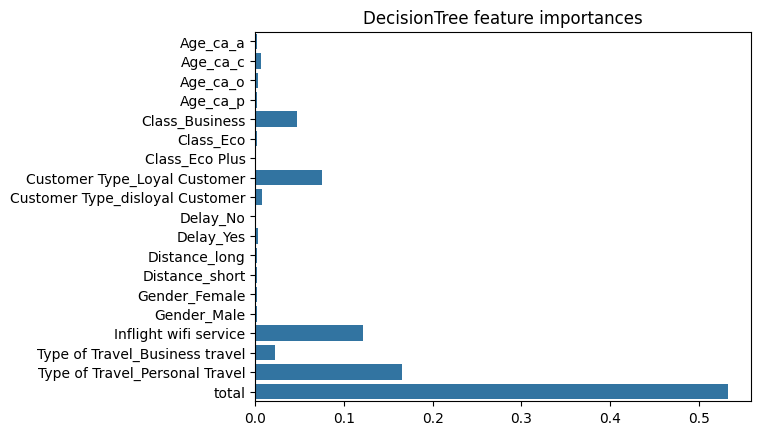

In [41]:
# 피처 중요도 시각화
feature_names = train_x.columns.tolist()

sns.barplot(x=model.feature_importances_, y=feature_names)
plt.title("DecisionTree feature importances")

In [42]:
# 랜덤포레스트 모델 사용
model = RandomForestClassifier(random_state=42)
model.fit(train_x, train_y)
y_predict = model.predict(test_x)
baserf = accuracy_score(test_y, y_predict) #정확도 출력
print("RandomForest Baseline: ", baserf*100)

train_p = model.predict(train_x)
print("RandomForest train: ",accuracy_score(train_y, train_p))

#auc 점수
print("RandomForest AUC: ",roc_auc_score(test_y, model.predict_proba(test_x)[:,1]))

RandomForest Baseline:  88.42392978133662
RandomForest train:  0.9157819944829892
RandomForest AUC:  0.9472587511310829


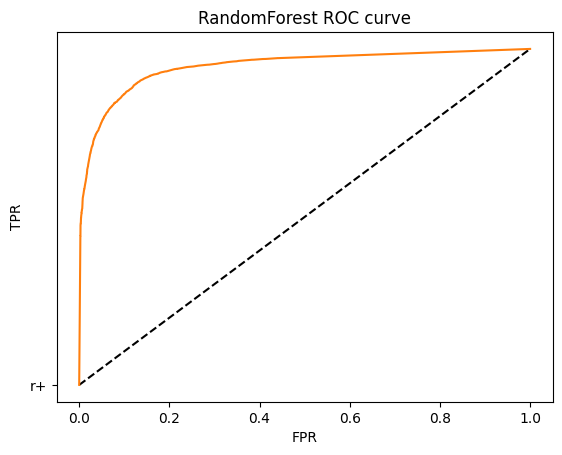

In [43]:

fpr, tpr, thresholds = roc_curve(test_y, model.predict_proba(test_x)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='DecisionTree')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForest ROC curve')
plt.show()

Text(0.5, 1.0, 'RandomForest feature importances')

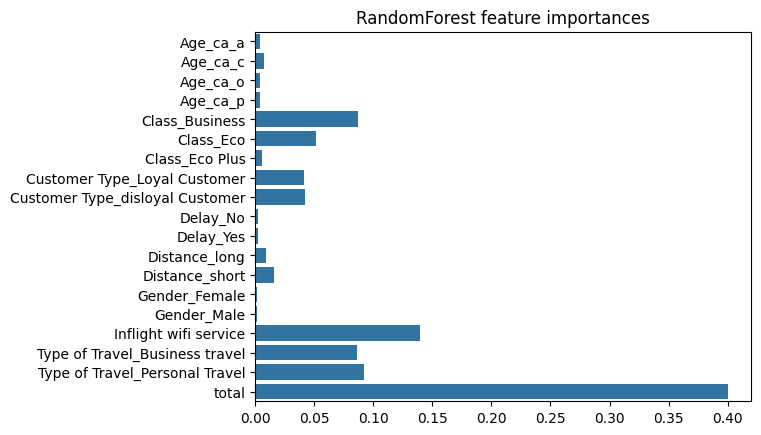

In [44]:
# 피처 중요도 시각화
feature_names = train_x.columns.tolist()

sns.barplot(x=model.feature_importances_, y=feature_names)
plt.title("RandomForest feature importances")

In [45]:
# GradientBoosting 사용
model = GradientBoostingClassifier(random_state=42)
model.fit(train_x, train_y)
y_predict = model.predict(test_x)
basegb = accuracy_score(test_y, y_predict) #정확도 출력
print("GradientBoosting Baseline: ", basegb*100)

#train 정확도
train_p = model.predict(train_x)
print("GradientBoosting train: ",accuracy_score(train_y, train_p))

#auc 점수
print("GradientBoosting AUC: ",roc_auc_score(test_y, model.predict_proba(test_x)[:,1]))

GradientBoosting Baseline:  88.62796427471513
GradientBoosting train:  0.9066810164674413
GradientBoosting AUC:  0.9499532239686306


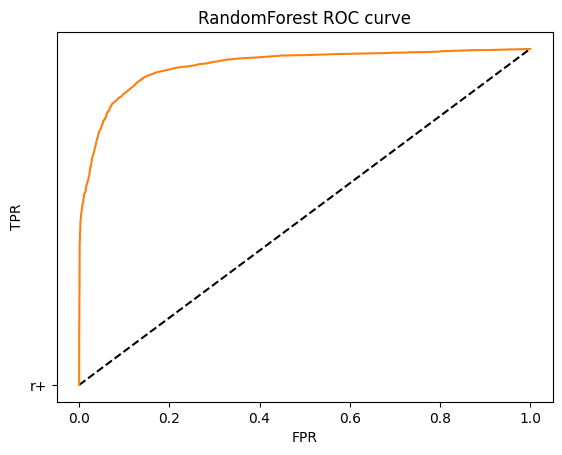

In [46]:

fpr, tpr, thresholds = roc_curve(test_y, model.predict_proba(test_x)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='DecisionTree')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForest ROC curve')
plt.show()

Text(0.5, 1.0, 'GradientBoosting feature importances')

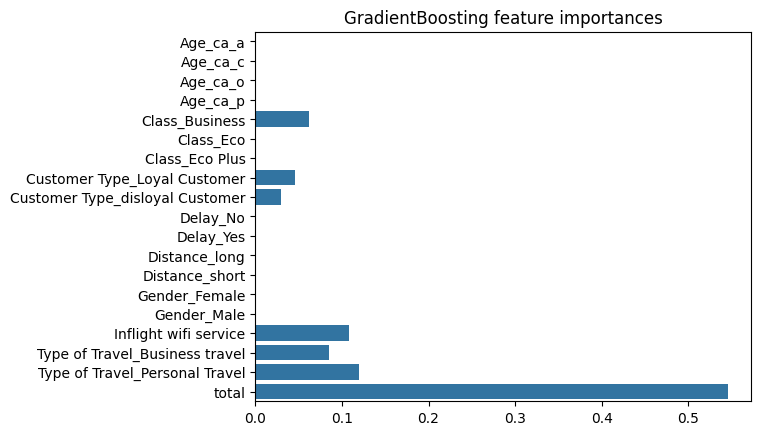

In [47]:
# 피처 중요도 시각화
feature_names = train_x.columns.tolist()

sns.barplot(x=model.feature_importances_, y=feature_names)
plt.title("GradientBoosting feature importances")

#### 하이퍼파라미터 탐색

- RandomizedSearchCV 사용

In [48]:
# 데이터 설정
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {"max_depth" :list(range(5, 30)),
           "max_features": np.random.uniform(0.5, 1.0, 50),
           "min_samples_split" : list(range(2, 20)),
           "min_samples_leaf" : list(range(2, 20))
           }

print(param_distributions)

{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'max_features': array([0.91253821, 0.68186344, 0.77450869, 0.74916971, 0.81382274,
       0.68104261, 0.80800428, 0.88312721, 0.71879109, 0.91644291,
       0.79829081, 0.68002117, 0.82851626, 0.5358178 , 0.59380229,
       0.97298614, 0.86837236, 0.73829198, 0.51549464, 0.58178552,
       0.69284584, 0.78858885, 0.53862925, 0.7274715 , 0.81487685,
       0.98581555, 0.63469809, 0.61494965, 0.52997953, 0.77116757,
       0.96803029, 0.60479052, 0.82160552, 0.67291162, 0.61001537,
       0.67541124, 0.71634026, 0.62459394, 0.66279954, 0.56948459,
       0.7730034 , 0.52545937, 0.80450907, 0.64141204, 0.64512394,
       0.90239092, 0.72232314, 0.87418014, 0.97155022, 0.94266069]), 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


In [49]:
# 결정 트리 탐색

dt =  DecisionTreeClassifier(random_state=42)

hyper_dt = RandomizedSearchCV(dt,
    param_distributions,
    n_iter=2000, #탐색 횟수
    scoring="accuracy", #평가 지표
    n_jobs=-1,
    cv=5, #fold 수
    random_state=42
    )

hyper_dt.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=2000, n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24,
                                                      25, 26, 27, 28, 29],
                                        'max_features': array([0.91253821, 0.68186344, 0.77450869, 0.74916971, 0.81382274,
       0.68104261, 0.80800428, 0.88312721, 0.71879109, 0.91644291,
       0.79829081, 0.6800...
       0.96803029, 0.60479052, 0.82160552, 0.67291162, 0.61001537,
       0.67541124, 0.71634026, 0.62459394, 0.66279954, 0.56948459,
       0.7730034 , 0.52545937, 0.80450907, 0.64141204, 0.64512394,
       0.90239092, 0.72232314, 0.87418014, 0.97155022, 0.94266069]),
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19]},
                   random_state=42, scoring='accuracy')

In [50]:
print(hyper_dt.best_params_)# 제일 좋은 조합 출력
print(hyper_dt.best_score_)# 제일 높은 점수

{'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': 0.8138227444968468, 'max_depth': 8}
0.9088753089389925


In [51]:
hyper_dt.score(test_x, test_y) # test 결과

0.8876655374191561

In [52]:
#best 모델로 평가 지표 확인

from sklearn.metrics import f1_score

bestdt = DecisionTreeClassifier(random_state=42,min_samples_split=6, min_samples_leaf=17,max_features =  0.8772559107209367,max_depth=8 )
bestdt.fit(train_x, train_y)
y_predict = bestdt.predict(test_x)
acdt = accuracy_score(test_y, y_predict)
print("DecisionTree accuracy: ", acdt*100)

train_p = bestdt.predict(train_x)
print("DecisionTree train: ",accuracy_score(train_y, train_p))

#auc 점수
print("DecisionTree AUC: ",roc_auc_score(test_y, bestdt.predict_proba(test_x)[:,1]))


#f1 스코어
f1 = f1_score(test_y, y_predict)
print("DecisionTree f1_score: ", f1)

DecisionTree accuracy:  88.73575608253773
DecisionTree train:  0.9100664549026164
DecisionTree AUC:  0.9496416926690804
DecisionTree f1_score:  0.8670120898100173


Text(0.5, 1.0, 'Best DecisionTree feature importances')

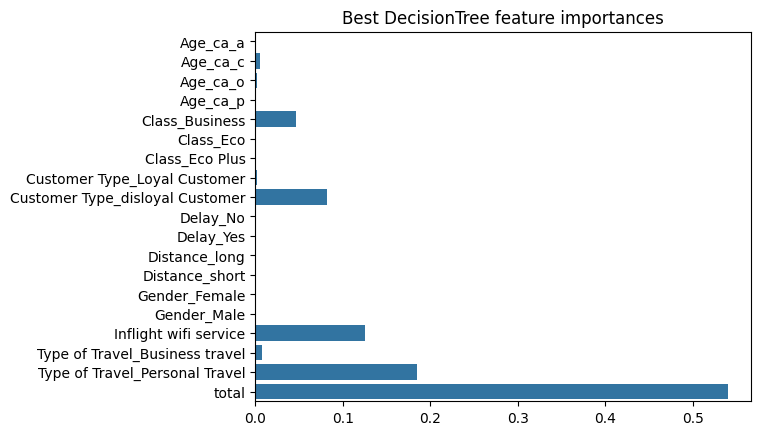

In [53]:
feature_names = train_x.columns.tolist()

sns.barplot(x=bestdt.feature_importances_, y=feature_names)
plt.title("Best DecisionTree feature importances")

In [58]:
rf =  RandomForestClassifier(random_state=42)

hyper_rf = RandomizedSearchCV(rf,
    param_distributions,
    n_iter=20, #탐색 횟수
    scoring="accuracy", #평가 지표
    n_jobs=-1,
    cv=3, #fold 수
    verbose=2,
    random_state=42
    )

hyper_rf.fit(train_x, train_y)

print(hyper_rf.best_params_)# 제일 좋은 조합 출력
print(hyper_rf.best_score_)# 제일 높은 점수

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 0.5817855225892112, 'max_depth': 8}
0.9086454307789659


In [59]:
hyper_rf.score(test_x, test_y) # test 결과

0.8888589467200493

In [60]:
bestrf = RandomForestClassifier(random_state=42,min_samples_split=6, min_samples_leaf=9,max_features = 0.5817855225892112, max_depth=8 )
bestrf.fit(train_x, train_y)
y_predict = bestrf.predict(test_x)
acdt = accuracy_score(test_y, y_predict)
print("RandomForest accuracy: ", acdt*100)

train_p = bestrf.predict(train_x)
print("RandomForest train: ",accuracy_score(train_y, train_p))

#auc 점수
print("RandomForest AUC: ",roc_auc_score(test_y, bestrf.predict_proba(test_x)[:,1]))


#f1 스코어
f1 = f1_score(test_y, y_predict)
print("RandomForest f1_score: ", f1)

RandomForest accuracy:  88.88589467200492
RandomForest train:  0.9102545348156816
RandomForest AUC:  0.9524954304600535
RandomForest f1_score:  0.868897870214795


Text(0.5, 1.0, 'Best RandomForest feature importances')

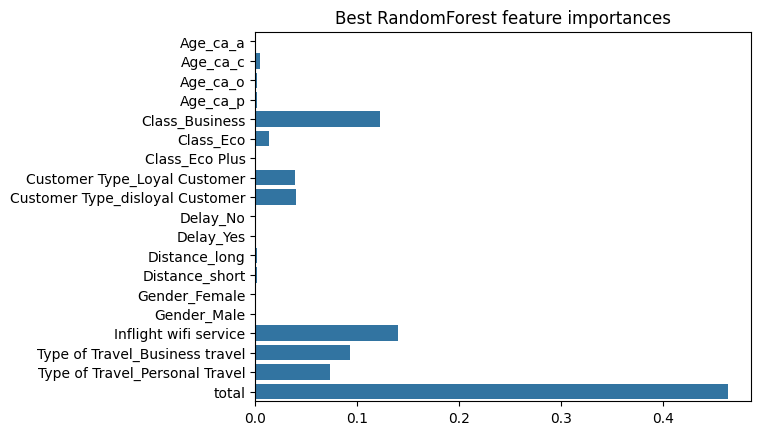

In [61]:
feature_names = train_x.columns.tolist()

sns.barplot(x=bestrf.feature_importances_, y=feature_names)
plt.title("Best RandomForest feature importances")

In [63]:
gb =  GradientBoostingClassifier(random_state=42)

hyper_gb = RandomizedSearchCV(gb,
    param_distributions,
    n_iter=15, #탐색 횟수
    scoring="accuracy", #평가 지표
    n_jobs=-1,
    cv=3, #fold 수
    random_state=42,
    verbose=2
    )

hyper_gb.fit(train_x, train_y)

print(hyper_gb.best_params_)# 제일 좋은 조합 출력
print(hyper_gb.best_score_)# 제일 높은 점수

Fitting 3 folds for each of 15 candidates, totalling 45 fits
{'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 0.5817855225892112, 'max_depth': 8}
0.9072139314789847


In [65]:
hyper_gb.score(test_x, test_y) # test 결과

0.8873960578995996

In [64]:
bestgb = GradientBoostingClassifier(random_state=42,min_samples_split=6, min_samples_leaf=9,max_features = 0.5817855225892112,max_depth=8 )
bestgb.fit(train_x, train_y)
y_predict = bestgb.predict(test_x)
acdt = accuracy_score(test_y, y_predict)
print("GradientBoosting accuracy: ", acdt*100)

train_p = bestgb.predict(train_x)
print("GradientBoosting train: ",accuracy_score(train_y, train_p))

#auc 점수
print("GradientBoosting AUC: ",roc_auc_score(test_y, bestgb.predict_proba(test_x)[:,1]))


#f1 스코어
f1 = f1_score(test_y, y_predict)
print("GradientBoosting f1_score: ", f1)

GradientBoosting accuracy:  88.73960578995997
GradientBoosting train:  0.9139952353088691
GradientBoosting AUC:  0.9517573812845891
GradientBoosting f1_score:  0.8678443952469164


Text(0.5, 1.0, 'Best GradientBoosting feature importances')

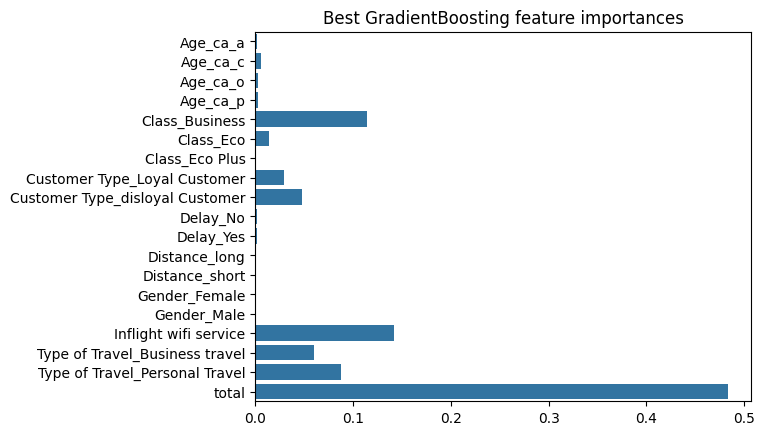

In [66]:
feature_names = train_x.columns.tolist()

sns.barplot(x=bestgb.feature_importances_, y=feature_names)
plt.title("Best GradientBoosting feature importances")

###### 결과 정리

DecisionTree Baseline:  88.43932861102556  
DecisionTree train:  0.9157819944829892  
DecisionTree AUC:  0.9412481028614021  

RandomForest Baseline:  88.42392978133662  
RandomForest train:  0.9157819944829892  
RandomForest AUC:  0.9472587511310829  

GradientBoosting Baseline:  88.62796427471513  
GradientBoosting train:  0.9066810164674413  
GradientBoosting AUC:  0.9499532239686306  


------------------- 하이퍼 파라미터 탐색 후 ------------------

DecisionTree accuracy:  88.73575608253773  
DecisionTree train:  0.9100664549026164  
DecisionTree AUC:  0.9496416926690804  
DecisionTree f1_score:  0.8670120898100173  

RandomForest accuracy:  88.88589467200492  
RandomForest train:  0.9102545348156816  
RandomForest AUC:  0.9524954304600535  
RandomForest f1_score:  0.868897870214795  

GradientBoosting accuracy:  88.73960578995997  
GradientBoosting train:  0.9139952353088691  
GradientBoosting AUC:  0.9517573812845891  
GradientBoosting f1_score:  0.8678443952469164


  

baseline 에서 가장 성능이 좋았던 것은 GradientBoosting 알고리즘  
하이퍼파라미터 탐색 시, 제일 성능이 좋은 것은 랜덤 포레스트 알고리즘
 - GradientBoosting의 경우 탐색 횟수가 적어서 그럴 가능성이 존재.

전체적으로 탐색 후 큰 차이가 존재하지 않지만 랜덤 포레스트와 결정 트리는 탐색 후 과적합이 소폭 감소하였음
